<div class="usecase-title">Public Event Planning</div>

<div class="usecase-authors"><b>Authored by: </b> Samiha Haque</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Data Visualization, Data Wrangling, Machine Learning Models, Deep Learning, Geographical Coordinate Handling</div>
    
</div>

<div class="usecase-section-header">Scenario</div>

- As an event planner, I want to know the locations of past public events so that I can run my own public events - sport/promotion/music/filming/photo shoot/memorial/public holiday with ease.

- As an event planner, I want to know about available parking areas near the events so that my guests can park their cars with ease.

- As an event planner, I want to know closest banner spots near my events so that I can promote my events successfully

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- Learn to work with categorical locations and geolocations using geopy
- Learn to plot multiple geolocations on a map using folium
- Learn preprocessing steps such as binary encoding, handling datetime objects, creating new features, fixing skewness, standardising and scaling of data
- Learn to built a Feed Forward Neural Network(FFNN) using optimal grid search hyperparameters
- Learn to use train and test embeddings extracted from second last layer of FFNN
- Learn to find nearest neighbours using KNeighborsRegressor and NearestNeighbors

<div class="usecase-section-header"><b>Business Friendy and Digitally Connected City</b></div>

The two of the eight priorities of the Economic Development Strategy 2031 of the city of Melbourne is to create a business friendly city and to develop a digitally connected city. Supporting businesses like event planning will help to drive the economy recovery and also help to map and connect public events, parkings and promotions through out the city of Melboune.

Datasets used:

- [Event permits 2014-2018 including film shoots, photo shoots, weddings, Christmas parties, promotions, fun runs and public events](https://data.melbourne.vic.gov.au/explore/dataset/event-permits-2014-2018-including-film-shoots-photo-shoots-weddings-christmas-pa/information/)<br>
This dataset mainly contains the category, start date, end date and categorical location of different events that get permits throughout the city of Melbourne. This dataset is used to identify the locations where each category of events take place. This dataset is imported from Melbourne Open Data website, using API V2.1.</p>
- [On-street Parking Bay Sensors](https://data.melbourne.vic.gov.au/explore/dataset/on-street-parking-bay-sensors/information/)<br>
This dataset mainly contains the zone number, status and geolocation  of parking spots throughout the city of Melbourne. This dataset is used to find the nearest parking spots around any given event. This dataset is imported from Melbourne Open Data website, using API V2.1</p>
- [Bookable Banner Poles](https://data.melbourne.vic.gov.au/explore/dataset/bookable-banner-poles/information/)<br>
This dataset mainly contains the type, geolocation and booking group of five types of banners throughout the city of Melbourne which are 2.0, 4.0, 5.0, 6.0, 7.0 and 8.0. This dataset is used to find the nearest location of banners given any event location for promotional activities. This dataset is imported from Melbourne Open Data website, using API V2.1</p>

In [ ]:
pip install scikeras

In [ ]:
pip install geopy

In [ ]:
pip install folium

In [ ]:
pip install category_encoders

In [ ]:
#importing dependencies
import requests
import pandas as pd
import numpy as np
from datetime import datetime
from io import StringIO
import geopy
from geopy.geocoders import Nominatim
import folium
from ipywidgets import interact, widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from category_encoders.binary import BinaryEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor

from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from keras.layers import LeakyReLU
from keras.optimizers import Adadelta
from tensorflow.keras.layers import BatchNormalization


from keras import backend as K
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV


In [178]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='bookable-banner-poles'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    banner_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(banner_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

   asset_number                                  asset_description  \
0       1110368  Standard Banner Pole - Lansdowne St: Wellingto...   
1       1110057                    Banner Pole - Super Banner Pole   
2       1110093                    Banner Pole - Super Banner Pole   
3       1110096                    Banner Pole - Super Banner Pole   
4       1110108                    Banner Pole - Super Banner Pole   
5       1350904                    Banner Pole - Super Banner Pole   
6       1110027                    Banner Pole - Super Banner Pole   
7       1110286  Super Banner Pole - Bourke St: Exhibition St -...   
8       1110544  Standard Banner Pole - Lonsdale St: Elizabeth ...   
9       1110418  Standard Banner Pole - Errol St: Victoria St -...   

   banner_pole_type  book_group             model_descr_lupvalue  \
0               6.0        62.0    Banner Pole - Standard Banner   
1               2.0        79.0  Banner Pole - Super Banner Pole   
2               2.0      

In [151]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='on-street-parking-bay-sensors'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    parking_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(parking_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                 lastupdated           status_timestamp  zone_number  \
0  2023-12-14T04:45:34+00:00  2023-12-14T03:41:25+00:00       7695.0   
1  2023-12-14T04:45:34+00:00  2023-12-13T06:21:58+00:00       7939.0   
2  2023-12-14T23:45:34+00:00  2023-12-14T23:35:02+00:00          NaN   
3  2023-12-14T23:45:34+00:00  2023-12-14T22:39:46+00:00          NaN   
4  2023-12-18T04:45:34+00:00  2023-12-17T23:47:54+00:00       7310.0   
5  2023-12-18T04:45:34+00:00  2023-11-02T00:47:52+00:00       7050.0   
6  2023-12-18T04:45:34+00:00  2023-12-18T04:03:50+00:00       7310.0   
7  2023-12-18T04:45:34+00:00  2023-12-18T03:40:13+00:00       7310.0   
8  2023-11-15T04:44:42+00:00  2023-11-15T01:35:58+00:00       7363.0   
9  2023-11-15T04:44:42+00:00  2023-11-07T20:41:02+00:00          NaN   

  status_description  kerbsideid                                 location  
0         Unoccupied       22959   -37.81844776554182, 144.95938672872117  
1         Unoccupied       10136    -37.8099909364941, 

In [152]:
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='event-permits-2014-2018-including-film-shoots-photo-shoots-weddings-christmas-pa'


url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    events_df=pd.read_csv(StringIO(url_content),delimiter=';')
    print(events_df.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                    title event_start   event_end       category_1  \
0         Holding The Man  2014-10-07  2014-10-07  Filming - Movie   
1  A Journey With Anthony  2015-03-07  2015-03-15  Filming - Movie   
2           Ali's Wedding  2015-12-03  2015-12-03  Filming - Movie   
3                Dogfight  2016-08-26  2016-08-27  Filming - Movie   
4               Old Timer  2016-04-20  2016-04-20  Filming - Movie   
5      Spirit Of The Game  2015-08-19  2015-08-20  Filming - Movie   
6                Dogfight  2016-09-17  2016-09-17  Filming - Movie   
7               Surya TVC  2014-04-26  2014-04-27  Filming - Other   
8           Threethousand  2014-05-06  2014-05-06  Filming - Other   
9        Loving Melbourne  2014-06-21  2014-06-21  Filming - Other   

            category_2                                           location  
0                  NaN                                       Fawkner Park  
1                  NaN       Other Park Locations, Inner Suburb Locations  
2

### EVENTS
I carried out various data cleaning methods:
- <a href='#event_null'>Handled Null values</a>
- <a href='event_single_loc'>Created single location names</a>
- <a href='#loc_lat_lon'>Converted location names to latitudes and longitudes using geopy</a>
- <a href='#event_folium'>Displayed event locations on map using folium</a>
- <a href='#fix_category'>Cleaned category column</a>
- <a href='#datetime'>Converted event_start and event_end features to datetime objects, created a new feature column called 'duration' and converted event_start and event_end features to ordinal values</a>
- <a href='#event_encoding'>Encoded the categorical event categories using Binary Encoding</a>
- <a href='#event_skewness'>Corrected the skewness of data using Yeo Johnson power transformation</a> 
- <a href='#event_standardization'>Standardized the data to follow a Normal distribution</a>
- <a href='#event_normalization'>Scaled the data using MinMax scaling</a>

I built a Feed Forward Neural Network model to capture data patterns during training:
- <a href='#split'>Splitted the data into 80% training and 20% testing</a>
- <a href='#ffnn'>Built a Feed Forward Neural Network(FFNN) model</a>

I extracted the train and test embeddings from the second last layer of FFNN to be fed into the KNeighbors Regressor for better neighbor grouping. I trained  the KNeighbors Regressor on train embeddings and obtaining 5 nearest neighbors for test embeddings, getting 5 closest locations given any test data instance.
- <a href='#train_embedding'>Extracted the train and test embeddings</a>
- <a href='#knr'>KNR model with 5 nearest neighbors and creating the neighbour_df dataframe</a>

In [7]:
events_df.head()

title event_start   event_end       category_1  \
0         Holding The Man  2014-10-07  2014-10-07  Filming - Movie   
1  A Journey With Anthony  2015-03-07  2015-03-15  Filming - Movie   
2           Ali's Wedding  2015-12-03  2015-12-03  Filming - Movie   
3                Dogfight  2016-08-26  2016-08-27  Filming - Movie   
4               Old Timer  2016-04-20  2016-04-20  Filming - Movie   

          category_2                                           location  
0                NaN                                       Fawkner Park  
1                NaN       Other Park Locations, Inner Suburb Locations  
2                NaN                             Inner Suburb Locations  
3                NaN  Flagstaff Gardens, Collins Street, Flinders La...  
4  Filming - Student                                       Fawkner Park

In [8]:
events_df.shape

(2827, 6)

In [9]:
events_df.nunique()

title          1877
event_start    1155
event_end      1150
category_1       34
category_2       11
location        619
dtype: int64

In [10]:
events_df[['category_1']].value_counts()

category_1                             
Wedding                                    615
Public Event - Non-ticketed                446
Promotion                                  430
Filming - TV Series                        200
Public Event - Run Walk                    165
Filming - TVC                              158
Public Event - Ticketed                    111
Public Event - Low Impact Activity          92
Filming - Photo shoot                       90
Private Event                               87
Filming - Unit Base                         58
Filming - Student                           57
Public Event - Non Ticketed                 56
Public Event - Music Event                  41
Filming - Other                             40
Public Event - Media/Launch Event           36
Public Event - Run/Walk                     33
Public Event - Memorial                     25
Filming - Movie                             21
Public Event - Cycling Event                19
Public Event - Parad

<a id='event_null'></a>
<b>Handling null values</b>

In [11]:
events_df.isna().sum() #category_2 has highest null values

title             0
event_start       0
event_end         4
category_1        0
category_2     2751
location          5
dtype: int64

In [12]:
events_df[events_df['category_2'].notnull()][['category_1','category_2']].value_counts()
#Not much difference found between category_1 and category_2 values

category_1                          category_2           
Private Event                       Christmas Party          46
Filming - TV Series                 Filming - Unit            7
Public Event - Non-ticketed         Public                    7
Filming - Movie                     Filming - Unit Base       4
Filming - Photo shoot               Filming - Other           2
Filming - TVC                       Filming - Photo shoot     2
Filming - Movie                     Filming - Student         1
Filming - Photo shoot               Public Event              1
Filming - TVC                       Filming - Other           1
                                    Filming - TV Series       1
                                    Filming - Unit Base       1
Private Event -                     Christmas Party           1
Public Event - Low Impact Activity  Filming                   1
Public Event - Non-ticketed         Recrea                    1
Name: count, dtype: int64

In [13]:
events_df.drop(['title','category_2'],axis=1,inplace=True) #dropped category_2
events_df.head()

event_start   event_end       category_1  \
0  2014-10-07  2014-10-07  Filming - Movie   
1  2015-03-07  2015-03-15  Filming - Movie   
2  2015-12-03  2015-12-03  Filming - Movie   
3  2016-08-26  2016-08-27  Filming - Movie   
4  2016-04-20  2016-04-20  Filming - Movie   

                                            location  
0                                       Fawkner Park  
1       Other Park Locations, Inner Suburb Locations  
2                             Inner Suburb Locations  
3  Flagstaff Gardens, Collins Street, Flinders La...  
4                                       Fawkner Park

In [14]:
events_df.isna().sum()

event_start    0
event_end      4
category_1     0
location       5
dtype: int64

In [15]:
events_df[events_df['event_end'].isna()]

event_start event_end                               category_1  \
10    2014-12-08       NaN                          Filming - Other   
106   2016-02-25       NaN  Filming - TV Series Filming - TV Series   
418   2015-04-26       NaN              Public Event - Non-ticketed   
1559  2017-04-02       NaN                  Public Event - Ticketed   

                                               location  
10                                       Russell Street  
106   Alexandra Gardens, Kings Domain, All Other Spa...  
418                                         City Square  
1559                                       Kings Domain

In [16]:
events_df.dropna(axis=0,inplace=True) #drop rows which have null values

In [17]:
events_df.isna().sum()

event_start    0
event_end      0
category_1     0
location       0
dtype: int64

In [18]:
events_df.shape

(2818, 4)

<a id='event_single_loc'></a>
<b>Creating single location names for corresponding categories in each record</b>

In [19]:
category=events_df['category_1'].unique()
category_dict={}
for i in category:
    val=events_df.loc[events_df['category_1']==i,['location','event_start','event_end']]
    category_dict[i]=val

In [20]:
event_cat=[]
event_loc=[]
start_date=[]
end_date=[]
for i,j in category_dict.items():
    row=0
    for x in j['location']:
        if ", " in x:
            loc_lst=x.split(", ")
            for y in loc_lst:
                event_cat.append(i)
                start_date.append(j.iloc[row,1])
                end_date.append(j.iloc[row,2])
                event_loc.append(f"{y}, Melbourne, Australia")
        elif " - " in x:
            loc_lst=x.split(" - ")
            for y in loc_lst:
                event_cat.append(i)
                start_date.append(j.iloc[row,1])
                end_date.append(j.iloc[row,2])
                event_loc.append(f"{y}, Melbourne, Australia")
        else:
            event_cat.append(i)
            start_date.append(j.iloc[row,1])
            end_date.append(j.iloc[row,2])
            event_loc.append(f"{x}, Melbourne, Australia")
        row+=1

In [21]:
events_loc_df=pd.DataFrame({'Events': event_cat, 'Location': event_loc,'Start_date':start_date,'End_date':end_date})
events_loc_df.head(10)

Events                                      Location  Start_date  \
0  Filming - Movie            Fawkner Park, Melbourne, Australia  2014-10-07   
1  Filming - Movie    Other Park Locations, Melbourne, Australia  2015-03-07   
2  Filming - Movie  Inner Suburb Locations, Melbourne, Australia  2015-03-07   
3  Filming - Movie  Inner Suburb Locations, Melbourne, Australia  2015-12-03   
4  Filming - Movie       Flagstaff Gardens, Melbourne, Australia  2016-08-26   
5  Filming - Movie          Collins Street, Melbourne, Australia  2016-08-26   
6  Filming - Movie           Flinders Lane, Melbourne, Australia  2016-08-26   
7  Filming - Movie   Little Collins Street, Melbourne, Australia  2016-08-26   
8  Filming - Movie           Market Street, Melbourne, Australia  2016-08-26   
9  Filming - Movie            Queen Street, Melbourne, Australia  2016-08-26   

     End_date  
0  2014-10-07  
1  2015-03-15  
2  2015-03-15  
3  2015-12-03  
4  2016-08-27  
5  2016-08-27  
6  2016-08-27  
7  2016-08-27  
8  2016-08-27  
9  2016-08-27

In [22]:
events_loc_df.shape

(5132, 4)

<a id='loc_lat_lon'></a>
<b>Converting location names to latitude,longitude coordinates using geolocator</b>

In [23]:
# @retrying.retry(wait_fixed=2000, stop_max_attempt_number=5)
def coordinates(location):
    loc = geolocator.geocode(location)
    if loc:
        return loc.latitude, loc.longitude
    else:
        raise Exception("Geocoding failed")


lat=[]
lon=[]
lookup_loc=[]
lookup_lat=[]
lookup_lon=[]

geolocator = Nominatim(user_agent="my_geocoder",timeout=5)


for i in events_loc_df['Location']:
    
    if i not in lookup_loc:
        
        try:
            l1,l2=coordinates(i)
  
            if l2:
                lat.append(l1)
                lon.append(l2)
                lookup_loc.append(i)
                lookup_lat.append(l1)
                lookup_lon.append(l2)
          
        except Exception as e:
            lat.append(i)
            lon.append(i)
            lookup_loc.append(i)
            lookup_lat.append(i)
            lookup_lon.append(i)
    else:
        ind=lookup_loc.index(i)
        
        lat.append(lookup_lat[ind])
        lon.append(lookup_lon[ind])
        
    

In [24]:
len(lat),len(lon),len(event_cat)

(5132, 5132, 5132)

<b>New Dataframe with Category, Start_date, End_date, Latitude, Longitude and Location</b>

In [25]:
events_lat_lon = pd.DataFrame({'Category': event_cat,'Start_date':start_date,'End_date':end_date, 'Latitude': lat,'Longitude':lon,'Location':event_loc})

In [26]:
events_lat_lon.head()

Category  Start_date    End_date  \
0  Filming - Movie  2014-10-07  2014-10-07   
1  Filming - Movie  2015-03-07  2015-03-15   
2  Filming - Movie  2015-03-07  2015-03-15   
3  Filming - Movie  2015-12-03  2015-12-03   
4  Filming - Movie  2016-08-26  2016-08-27   

                                       Latitude  \
0                                    -37.841461   
1    Other Park Locations, Melbourne, Australia   
2  Inner Suburb Locations, Melbourne, Australia   
3  Inner Suburb Locations, Melbourne, Australia   
4                                    -37.810879   

                                      Longitude  \
0                                    144.981868   
1    Other Park Locations, Melbourne, Australia   
2  Inner Suburb Locations, Melbourne, Australia   
3  Inner Suburb Locations, Melbourne, Australia   
4                                    144.954607   

                                       Location  
0            Fawkner Park, Melbourne, Australia  
1    Other Park Locations, Melbourne, Australia  
2  Inner Suburb Locations, Melbourne, Australia  
3  Inner Suburb Locations, Melbourne, Australia  
4       Flagstaff Gardens, Melbourne, Australia

<b>Checking latitude,longitude values which could not be converted to coordinates</b>

In [27]:
events_lat_lon.loc[events_lat_lon['Latitude'].apply(lambda x: isinstance(x, str)),'Latitude'].value_counts()

Latitude
Inner Suburb Locations, Melbourne, Australia                               273
Other Park Locations, Melbourne, Australia                                 140
Promotional Sites, Melbourne, Australia                                    140
Southbank Spillway, Melbourne, Australia                                   123
Roads / Public Access Spaces, Melbourne, Australia                          88
All Other Spaces, Melbourne, Australia                                      83
Bourke St Mall - next to Tourism booth, Melbourne, Australia                75
next to Tourism booth, Melbourne, Australia                                 57
Southbank Spillway , Melbourne, Australia                                   53
AG - Riverslide Skate Park, Melbourne, Australia                            38
Argyle Square Stage Only, Melbourne, Australia                              21
Meyers Place (Green Laneway), Melbourne, Australia                          13
Other Laneways/Places/Alleys, Melbourne, Au

<b>Manually converting few selected longitude, latitude coordinates(Assumed all inner suburbs as Carlton)</b>

In [28]:
events_lat_lon.loc[events_lat_lon['Latitude']=='Bourke St Mall - next to Tourism booth, Melbourne, Australia','Latitude']=-37.811425719556375
events_lat_lon.loc[events_lat_lon['Longitude']=='Bourke St Mall - next to Tourism booth, Melbourne, Australia','Longitude']=144.9642798285428

events_lat_lon.loc[events_lat_lon['Latitude']=='AG - Riverslide Skate Park, Melbourne, Australia','Latitude']=-37.81740602754738
events_lat_lon.loc[events_lat_lon['Longitude']=='AG - Riverslide Skate Park, Melbourne, Australia','Longitude']=144.9729885581025

events_lat_lon.loc[events_lat_lon['Latitude']=='Argyle Square Stage Only, Melbourne, Australia','Latitude']=-37.79994933523437
events_lat_lon.loc[events_lat_lon['Longitude']=='Argyle Square Stage Only, Melbourne, Australia','Longitude']=144.9668979307423

events_lat_lon.loc[events_lat_lon['Latitude']=='Meyers Place (Green Laneway), Melbourne, Australia','Latitude']=-37.809521131914906
events_lat_lon.loc[events_lat_lon['Longitude']=='Meyers Place (Green Laneway), Melbourne, Australia','Longitude']=144.97168456715806

events_lat_lon.loc[events_lat_lon['Latitude']=='BM Birrarung Marr, Melbourne, Australia','Latitude']=-37.819058
events_lat_lon.loc[events_lat_lon['Longitude']=='BM Birrarung Marr, Melbourne, Australia','Longitude']=144.974327

events_lat_lon.loc[events_lat_lon['Latitude']=='NMCC Soccer, Melbourne, Australia','Latitude']=-37.79280741138573
events_lat_lon.loc[events_lat_lon['Longitude']=='NMCC Soccer, Melbourne, Australia','Longitude']=144.93997444199712

events_lat_lon.loc[events_lat_lon['Latitude']=='Southern Cross Pedestrian Bridge, Melbourne, Australia','Latitude']=-37.815430188169096
events_lat_lon.loc[events_lat_lon['Longitude']=='Southern Cross Pedestrian Bridge, Melbourne, Australia','Longitude']=144.95278728089147

events_lat_lon.loc[events_lat_lon['Latitude']=='Chinatown Plaza, Melbourne, Australia','Latitude']=-37.81055582784353
events_lat_lon.loc[events_lat_lon['Longitude']=='Chinatown Plaza, Melbourne, Australia','Longitude']=144.96919346931784

events_lat_lon.loc[events_lat_lon['Latitude']=='Chinatown Plaza - see notes., Melbourne, Australia','Latitude']=-37.81055582784353
events_lat_lon.loc[events_lat_lon['Longitude']=='Chinatown Plaza - see notes., Melbourne, Australia','Longitude']=144.96919346931784

events_lat_lon.loc[events_lat_lon['Latitude']=='Northbank Promenade, Melbourne, Australia','Latitude']=-37.81883297899373
events_lat_lon.loc[events_lat_lon['Longitude']=='Northbank Promenade, Melbourne, Australia','Longitude']=144.93761358465892

events_lat_lon.loc[events_lat_lon['Latitude']=='Katherine Place (Green Laneway), Melbourne, Australia','Latitude']=-37.81333297388235
events_lat_lon.loc[events_lat_lon['Longitude']=='Katherine Place (Green Laneway), Melbourne, Australia','Longitude']=144.95689812465994

events_lat_lon.loc[events_lat_lon['Latitude']=='Bourke Street Mall - outfront of Adidas , Melbourne, Australia','Latitude']=-37.810705051858356
events_lat_lon.loc[events_lat_lon['Longitude']=='Bourke Street Mall - outfront of Adidas , Melbourne, Australia','Longitude']=144.96585977852442

events_lat_lon.loc[events_lat_lon['Latitude']=='Guildford Lane (Green Laneway(, Melbourne, Australia','Latitude']=-37.80945842151978
events_lat_lon.loc[events_lat_lon['Longitude']=='Guildford Lane (Green Laneway(, Melbourne, Australia','Longitude']=144.95981316261063

events_lat_lon.loc[events_lat_lon['Latitude']=='Straughton Lane, Melbourne, Australia','Latitude']=-37.81535364281512
events_lat_lon.loc[events_lat_lon['Longitude']=='Straughton Lane, Melbourne, Australia','Longitude']=144.96409712401254

events_lat_lon.loc[events_lat_lon['Latitude']=='Drewery Alley Drewery Lane, Melbourne, Australia','Latitude']=-37.808345973082375
events_lat_lon.loc[events_lat_lon['Longitude']=='Drewery Alley Drewery Lane, Melbourne, Australia','Longitude']=144.96437611033417

events_lat_lon.loc[events_lat_lon['Latitude']=='Drewery Alley - sensitive area many residents, Melbourne, Australia','Latitude']=-37.808345973082375
events_lat_lon.loc[events_lat_lon['Longitude']=='Drewery Alley - sensitive area many residents, Melbourne, Australia','Longitude']=144.96437611033417

events_lat_lon.loc[events_lat_lon['Latitude']=='Inner Suburb Locations, Melbourne, Australia','Latitude']=-37.798004076503936
events_lat_lon.loc[events_lat_lon['Longitude']=='Inner Suburb Locations, Melbourne, Australia','Longitude']=144.96662295572335

In [29]:
events_lat_lon.loc[events_lat_lon['Latitude'].apply(lambda x: isinstance(x, str)),'Latitude'].value_counts()

Latitude
Other Park Locations, Melbourne, Australia                                 140
Promotional Sites, Melbourne, Australia                                    140
Southbank Spillway, Melbourne, Australia                                   123
Roads / Public Access Spaces, Melbourne, Australia                          88
All Other Spaces, Melbourne, Australia                                      83
next to Tourism booth, Melbourne, Australia                                 57
Southbank Spillway , Melbourne, Australia                                   53
Other Laneways/Places/Alleys, Melbourne, Australia                          12
Shrine Reserve, Melbourne, Australia                                         8
Street Locations, Melbourne, Australia                                       8
HP - Cricket Nets, Melbourne, Australia                                      6
HP - Running Track, Melbourne, Australia                                     5
Privately Managed Event Spaces, Melbourne, 

<b>New Dataframe without any unresolved coordinates</b>

In [30]:
events_lat_lon=events_lat_lon[events_lat_lon['Latitude'].apply(lambda x: not isinstance(x, str))]
events_lat_lon.head()

Category  Start_date    End_date   Latitude   Longitude  \
0  Filming - Movie  2014-10-07  2014-10-07 -37.841461  144.981868   
2  Filming - Movie  2015-03-07  2015-03-15 -37.798004  144.966623   
3  Filming - Movie  2015-12-03  2015-12-03 -37.798004  144.966623   
4  Filming - Movie  2016-08-26  2016-08-27 -37.810879  144.954607   
5  Filming - Movie  2016-08-26  2016-08-27 -37.814022  144.971368   

                                       Location  
0            Fawkner Park, Melbourne, Australia  
2  Inner Suburb Locations, Melbourne, Australia  
3  Inner Suburb Locations, Melbourne, Australia  
4       Flagstaff Gardens, Melbourne, Australia  
5          Collins Street, Melbourne, Australia

In [31]:
events_lat_lon.shape

(4363, 6)

<a id='event_folium'></a>
<b>Displaying the event locations on map using Folium</b>

In [32]:
e = folium.Map(location=[events_lat_lon['Latitude'].mean(), events_lat_lon['Longitude'].mean()], zoom_start=10)

# Add markers for each location
for index, row in events_lat_lon.iterrows():

    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Location'],icon=folium.Icon("blue"),icon_size=(3, 3)).add_to(e)

    
legend_html = """
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 150px; height:50px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white; opacity: 0.8;">
       <p style="text-align:center; margin: 0;"><strong>Legend</strong></p>
       <p style="margin: 0;">Event Location: <span style="color:lightblue">&#9679;</span></p>
</div>
"""
    
# Add legend HTML to the map
e.get_root().html.add_child(folium.Element(legend_html))
    
title_html = """
<h3 style="text-align: center; margin: 10px 0;">Event Locations</h3>
"""
e.get_root().html.add_child(folium.Element(title_html))



display(e)

<a id='fix_category'></a>
<b>Manually correcting some Category names</b>

In [33]:
events_lat_lon['Category'].value_counts()

Category
Public Event - Non-ticketed            815
Wedding                                612
Promotion                              552
Public Event - Run Walk                427
Filming - TVC                          334
Filming - TV Series                    271
Public Event - Ticketed                219
Filming - Photo shoot                  138
Public Event - Low Impact Activity     117
Public Event - Run/Walk                111
Public Event - Parade                  109
Public Event - Non Ticketed            101
Public Event - Memorial                 87
Private Event                           80
Public Event - Cycling Event            68
Filming - Student                       66
Public Event - Media/Launch Event       47
Filming - Other                         44
Public Event - Music Event              43
Filming - Unit Base                     39
Filming - Movie                         27
Pubilc Event - Non-ticketed             24
Public Event - Music                     9
Pu

In [34]:
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Non-ticketed','Category']='Public Event - Non Ticketed'
events_lat_lon.loc[events_lat_lon['Category']=='Pubilc Event - Non-ticketed','Category']='Public Event - Non Ticketed'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Music Event','Category']='Public Event - Music'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Media/Launch Event','Category']='Public Event - Media Launch'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Run Walk','Category']='Public Event - Run/Walk'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Cycling Event','Category']='Public Event - Cycling'
events_lat_lon.loc[events_lat_lon['Category']=='Filming - TV Series Filming - TV Series','Category']='Filming - TV Series'
events_lat_lon.loc[events_lat_lon['Category']=='Filming - TV Series, Filming - Unit','Category']='Filming - TV Series'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Low Impact Activity,','Category']='Public Event - Low Impact Activity'
events_lat_lon.loc[events_lat_lon['Category']=='Public Event - Media Launch Event','Category']='Public Event - Media Launch'



In [35]:
events_lat_lon=events_lat_lon[events_lat_lon['Category'] != 'Private Event']

In [36]:
#Christmas party was private
events_lat_lon=events_lat_lon[events_lat_lon['Category'] != 'Private Event -']

In [37]:
events_lat_lon['Category'].value_counts()

Category
Public Event - Non Ticketed            940
Wedding                                612
Promotion                              552
Public Event - Run/Walk                538
Filming - TVC                          334
Filming - TV Series                    273
Public Event - Ticketed                219
Filming - Photo shoot                  138
Public Event - Low Impact Activity     118
Public Event - Parade                  109
Public Event - Memorial                 87
Public Event - Cycling                  73
Filming - Student                       66
Public Event - Media Launch             54
Public Event - Music                    52
Filming - Other                         44
Filming - Unit Base                     39
Filming - Movie                         27
Public Event - Outside Broadcast         4
Public Event                             2
Filming - TVC, Recreation and Sport      1
Name: count, dtype: int64

<a id='datetime'></a>
<b>Handling Datetime variable(New feature Duration created)</b>

In [38]:

events_lat_lon['Start_date']=events_lat_lon['Start_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
events_lat_lon['End_date']=events_lat_lon['End_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [39]:
duration=events_lat_lon['End_date']-events_lat_lon['Start_date']
events_lat_lon['Duration']=duration.dt.days

In [40]:
events_lat_lon['Start_ordinal'] = events_lat_lon['Start_date'].apply(lambda x: x.toordinal())
events_lat_lon['End_ordinal'] = events_lat_lon['End_date'].apply(lambda x: x.toordinal())

In [41]:
events_lat_lon.head()

Category Start_date   End_date   Latitude   Longitude  \
0  Filming - Movie 2014-10-07 2014-10-07 -37.841461  144.981868   
2  Filming - Movie 2015-03-07 2015-03-15 -37.798004  144.966623   
3  Filming - Movie 2015-12-03 2015-12-03 -37.798004  144.966623   
4  Filming - Movie 2016-08-26 2016-08-27 -37.810879  144.954607   
5  Filming - Movie 2016-08-26 2016-08-27 -37.814022  144.971368   

                                       Location  Duration  Start_ordinal  \
0            Fawkner Park, Melbourne, Australia         0         735513   
2  Inner Suburb Locations, Melbourne, Australia         8         735664   
3  Inner Suburb Locations, Melbourne, Australia         0         735935   
4       Flagstaff Gardens, Melbourne, Australia         1         736202   
5          Collins Street, Melbourne, Australia         1         736202   

   End_ordinal  
0       735513  
2       735672  
3       735935  
4       736203  
5       736203

In [42]:
events_lat_lon.drop_duplicates(keep='first', inplace=True)
events_lat_lon.duplicated().sum()

0

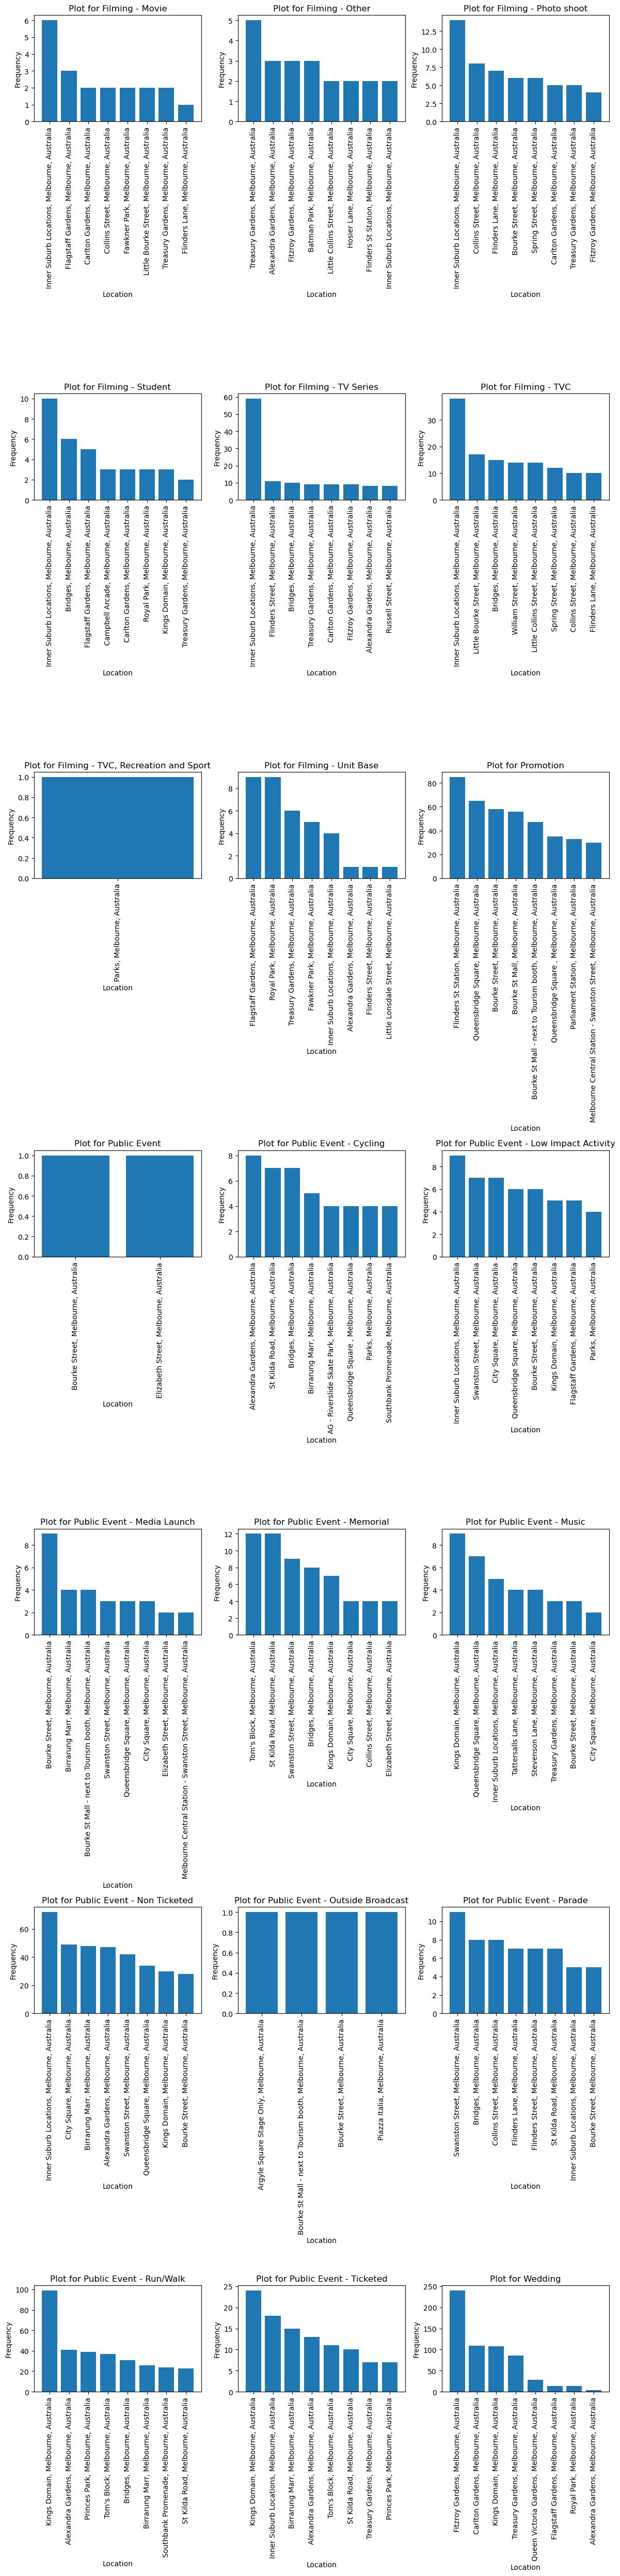

In [43]:
top_locations={}
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 50))

# Flatten the axes array to iterate over all subplots
axes = axes.flatten()

location_counts = events_lat_lon.groupby(['Category', 'Location']).size().reset_index(name='Frequency')

#top 8 locations for each event
Z=location_counts.groupby('Category')
num=0
for i in Z:
    cat=i[0]
    df=pd.DataFrame(i[1])
    df=df.sort_values(by='Frequency', ascending=False)
    top_x=df['Location'][:8].values
    top_y=df['Frequency'][:8].values

    top_locations[cat]=top_x

    ax = axes[num]

    ax.bar(top_x, top_y, label=cat)
    ax.set_title(f'Plot for {cat}')
    ax.set_xlabel('Location')
    ax.set_ylabel('Frequency')
    ax.set_xticks(top_x)
    ax.set_xticklabels(top_x,rotation=90)
    num+=1


plt.tight_layout()
plt.show()



In [44]:
events_copy=events_lat_lon.copy()
events_copy=events_copy[['Category','Start_ordinal','End_ordinal','Duration','Location','Latitude','Longitude']]


In [45]:
events_copy.reset_index(drop=True,inplace=True)

In [46]:
events_copy['Category'].nunique()

21

<a id='event_encoding'></a>
<b>Encoded Category values using Binary encoding</b>

In [47]:
cat=events_copy['Category']
binary_encoder = BinaryEncoder(cols=['Category'])

# Fit and transform the DataFrame
binary_encoder.fit(events_copy)
events_copy=binary_encoder.transform(events_copy)

events_copy['Category']=cat
events_copy

Category_0  Category_1  Category_2  Category_3  Category_4  \
0              0           0           0           0           1   
1              0           0           0           0           1   
2              0           0           0           0           1   
3              0           0           0           0           1   
4              0           0           0           0           1   
...          ...         ...         ...         ...         ...   
4247           0           1           0           1           0   
4248           0           1           0           1           0   
4249           0           1           0           1           0   
4250           0           1           0           1           0   
4251           0           1           0           1           0   

      Start_ordinal  End_ordinal  Duration  \
0            735513       735513         0   
1            735664       735672         8   
2            735935       735935         0   
3            736202       736203         1   
4            736202       736203         1   
...             ...          ...       ...   
4247         736600       736612        12   
4248         736600       736612        12   
4249         736600       736612        12   
4250         736600       736612        12   
4251         736619       736620         1   

                                              Location   Latitude   Longitude  \
0                   Fawkner Park, Melbourne, Australia -37.841461  144.981868   
1         Inner Suburb Locations, Melbourne, Australia -37.798004  144.966623   
2         Inner Suburb Locations, Melbourne, Australia -37.798004  144.966623   
3              Flagstaff Gardens, Melbourne, Australia -37.810879  144.954607   
4                 Collins Street, Melbourne, Australia -37.814022  144.971368   
...                                                ...        ...         ...   
4247           Alexandra Gardens, Melbourne, Australia -37.821242  144.973663   
4248  AG - Riverslide Skate Park, Melbourne, Australia -37.817406  144.972989   
4249               St Kilda Road, Melbourne, Australia -37.850028  144.980485   
4250         Queensbridge Square, Melbourne, Australia -37.821212  144.961919   
4251           Harbour Esplanade, Melbourne, Australia -37.815133  144.944919   

                    Category  
0            Filming - Movie  
1            Filming - Movie  
2            Filming - Movie  
3            Filming - Movie  
4            Filming - Movie  
...                      ...  
4247  Public Event - Cycling  
4248  Public Event - Cycling  
4249  Public Event - Cycling  
4250  Public Event - Cycling  
4251  Public Event - Cycling  

[4252 rows x 12 columns]

<b>Plotting histograms of each numeric feature to visualise the distribution and check for skewness</b>

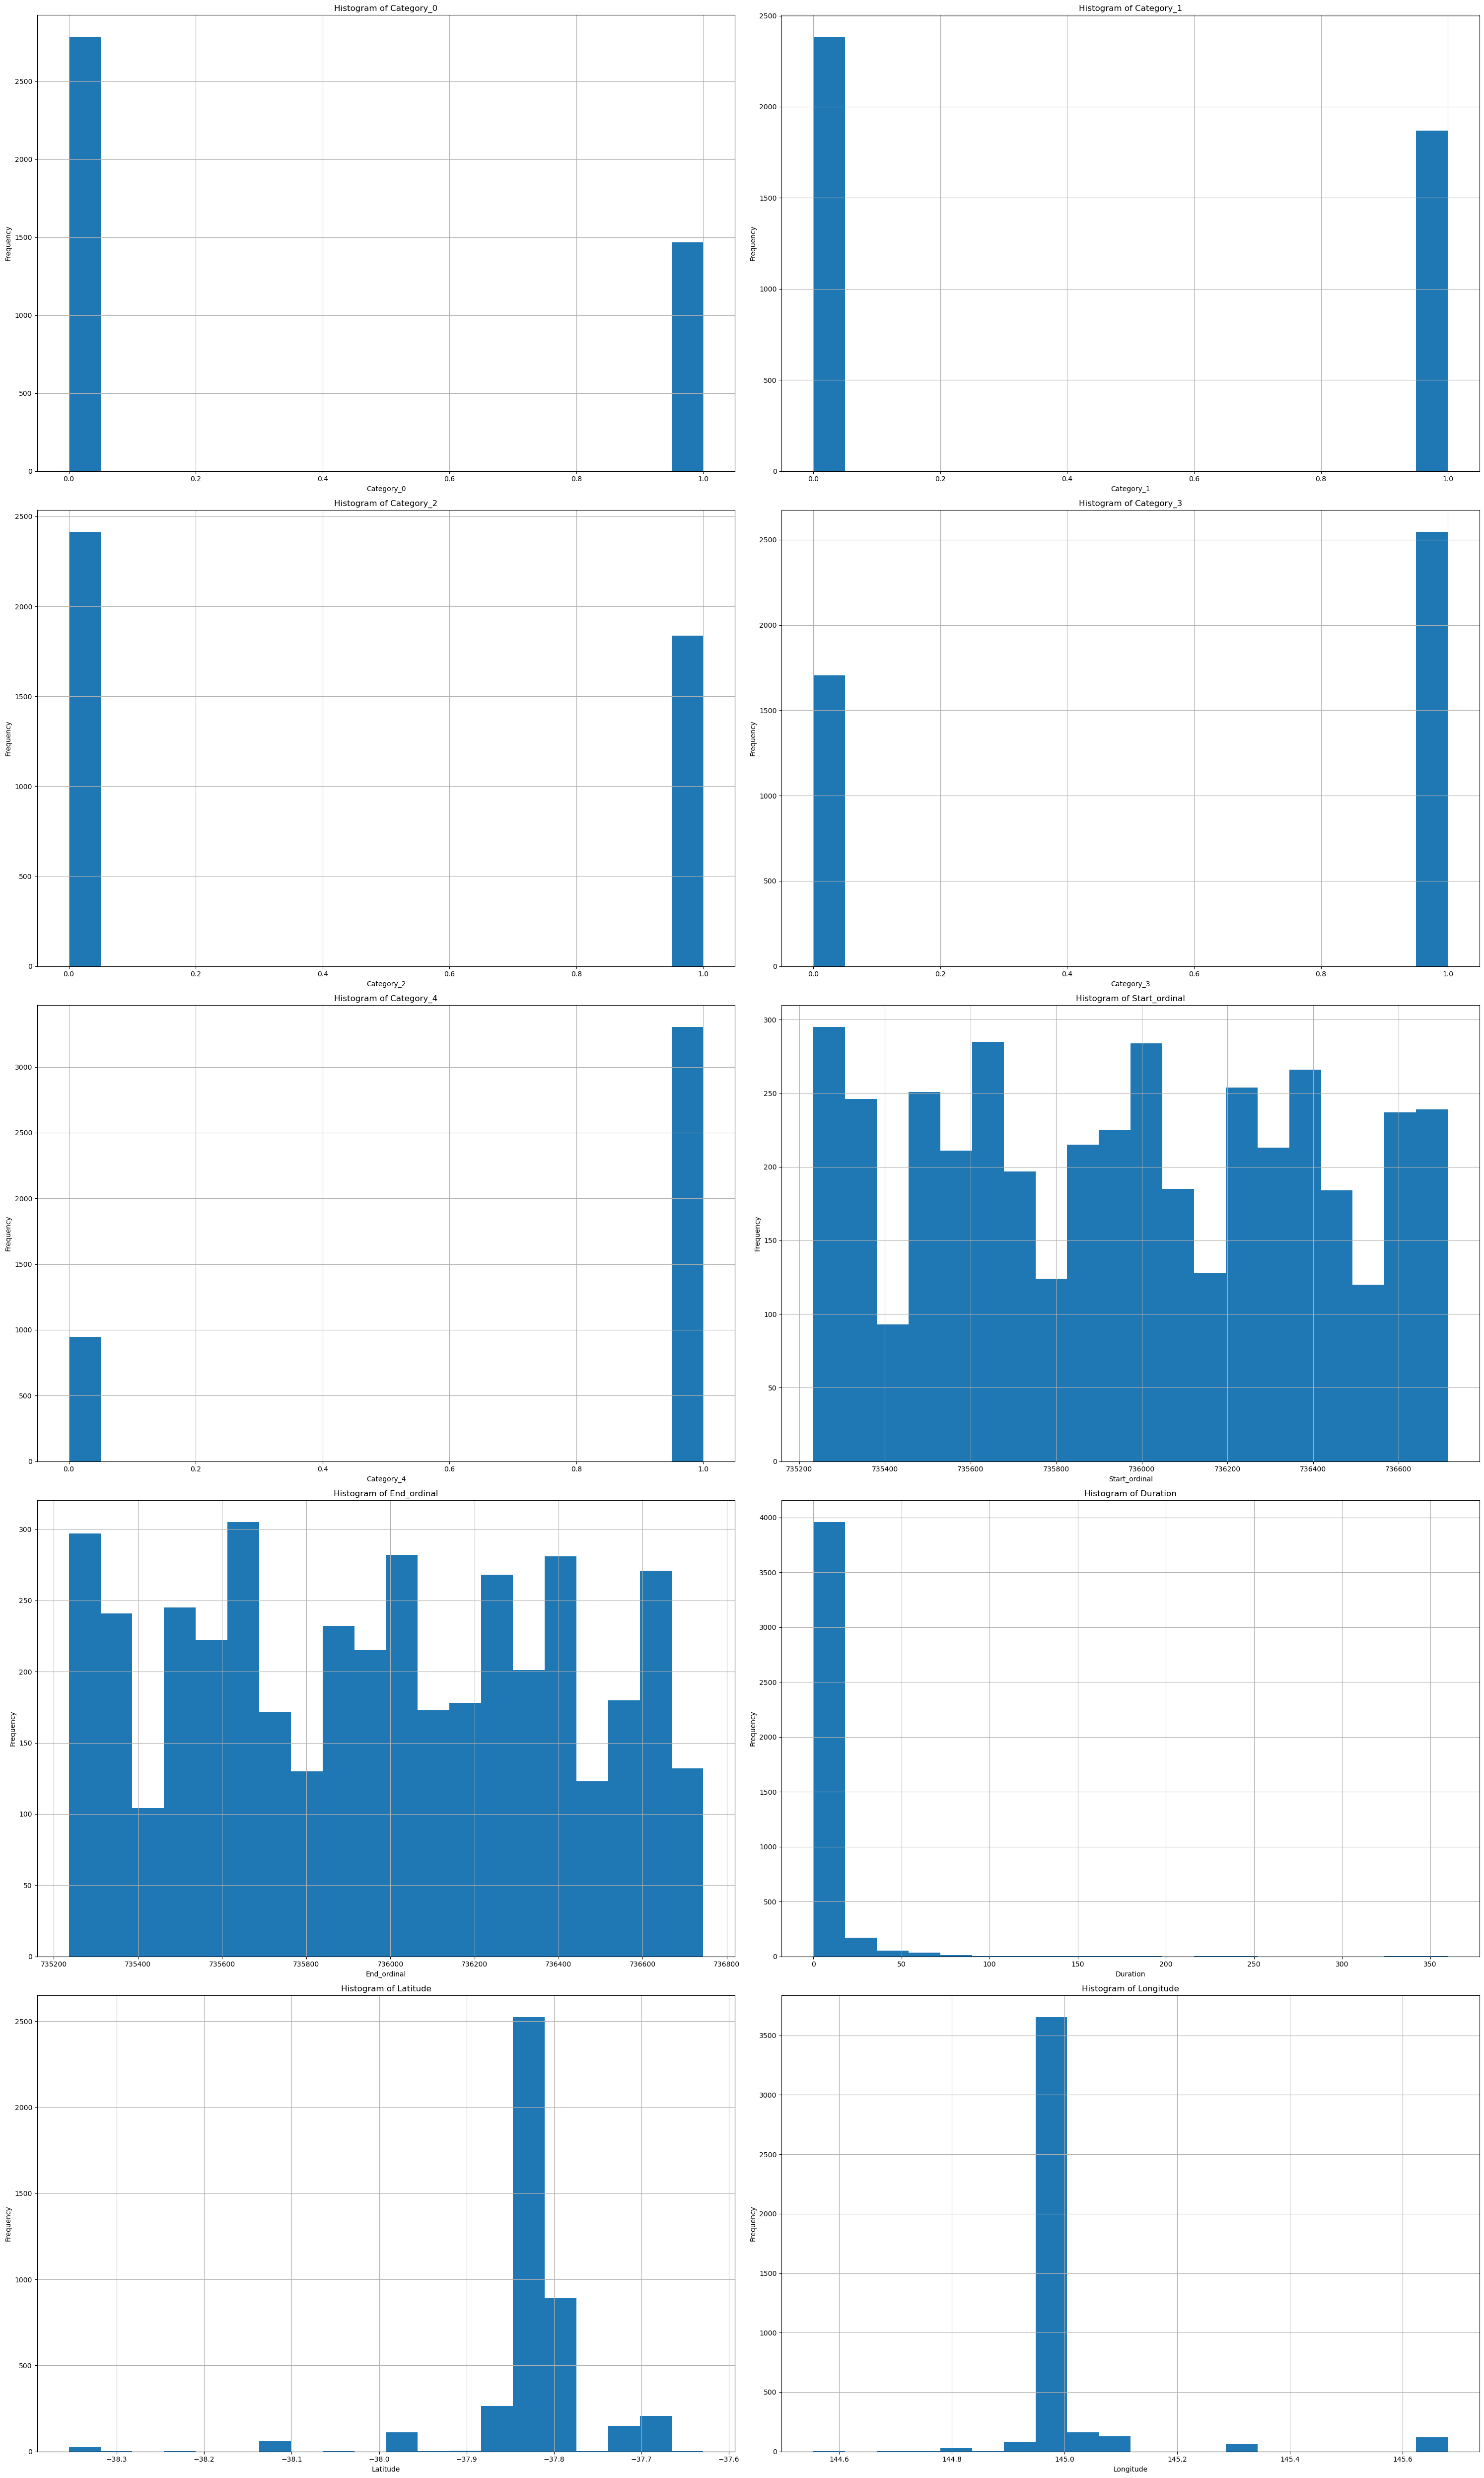

In [48]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude','Longitude']

fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(30, 50))
num=0
for column in cols:

    ax=axes.flatten()[num] # Adjust figure size as needed
    ax.hist(events_copy[column], bins=20)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)
    num+=1

plt.tight_layout()
plt.show()

<b>Plotting the heatmap of all the numeric features to check for correlations</b>

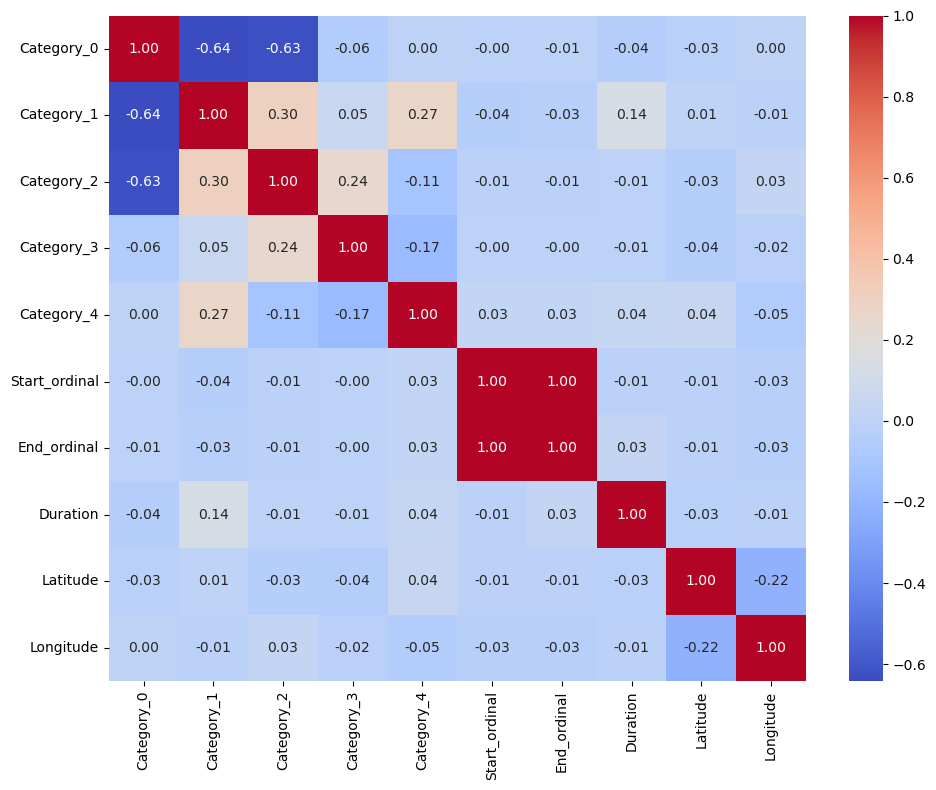

In [49]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude','Longitude']
events_corr = events_copy[cols].corr()
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(events_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()


<a id='event_skewness'></a>
<b>Checking skewness of features</b>

In [50]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude','Longitude']
skewness=events_copy[cols].skew()
# Print the skewness of each feature
print("Skewness of Features:")
print(skewness)

Skewness of Features:
Category_0       0.653386
Category_1       0.244603
Category_2       0.273549
Category_3      -0.403194
Category_4      -1.331694
Start_ordinal    0.014341
End_ordinal      0.012988
Duration         10.50623
Latitude        -3.529709
Longitude        4.425849
dtype: object


<b>It can be seen that Duration is heavily positively skewed. Category_0 and Category_4 also have some skewness but they are binary features so any modification is not required.</b>

<b>Yeo Johnson power transformation is applied since it works for both positive and negative data and is more robust</b>

In [51]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration']

pt = PowerTransformer(method='yeo-johnson')
yeojohnson_val_X = pt.fit_transform(events_copy[cols])

events_copy[cols]=yeojohnson_val_X

cols=['Latitude','Longitude']
pt = PowerTransformer(method='yeo-johnson')
yeojohnson_val_Y = pt.fit_transform(events_copy[cols])

events_copy[['Latitude Transformed','Longitude Transformed']]=yeojohnson_val_Y
events_copy

Category_0  Category_1  Category_2  Category_3  Category_4  \
0      -0.725398   -0.885188   -0.872578   -1.221630    0.535654   
1      -0.725398   -0.885188   -0.872578   -1.221630    0.535654   
2      -0.725398   -0.885188   -0.872578   -1.221630    0.535654   
3      -0.725398   -0.885188   -0.872578   -1.221630    0.535654   
4      -0.725398   -0.885188   -0.872578   -1.221630    0.535654   
...          ...         ...         ...         ...         ...   
4247   -0.725398    1.129704   -0.872578    0.818578   -1.866878   
4248   -0.725398    1.129704   -0.872578    0.818578   -1.866878   
4249   -0.725398    1.129704   -0.872578    0.818578   -1.866878   
4250   -0.725398    1.129704   -0.872578    0.818578   -1.866878   
4251   -0.725398    1.129704   -0.872578    0.818578   -1.866878   

      Start_ordinal  End_ordinal  Duration  \
0     -5.606626e-14    -1.043977 -0.826528   
1     -3.719247e-14    -0.677474  1.487449   
2     -3.219647e-15    -0.071633 -0.826528   
3      3.019807e-14     0.545218  0.406659   
4      3.019807e-14     0.545218  0.406659   
...             ...          ...       ...   
4247   7.993606e-14     1.485619  1.596276   
4248   7.993606e-14     1.485619  1.596276   
4249   7.993606e-14     1.485619  1.596276   
4250   7.993606e-14     1.485619  1.596276   
4251   8.237855e-14     1.504004  0.406659   

                                              Location   Latitude   Longitude  \
0                   Fawkner Park, Melbourne, Australia -37.841461  144.981868   
1         Inner Suburb Locations, Melbourne, Australia -37.798004  144.966623   
2         Inner Suburb Locations, Melbourne, Australia -37.798004  144.966623   
3              Flagstaff Gardens, Melbourne, Australia -37.810879  144.954607   
4                 Collins Street, Melbourne, Australia -37.814022  144.971368   
...                                                ...        ...         ...   
4247           Alexandra Gardens, Melbourne, Australia -37.821242  144.973663   
4248  AG - Riverslide Skate Park, Melbourne, Australia -37.817406  144.972989   
4249               St Kilda Road, Melbourne, Australia -37.850028  144.980485   
4250         Queensbridge Square, Melbourne, Australia -37.821212  144.961919   
4251           Harbour Esplanade, Melbourne, Australia -37.815133  144.944919   

                    Category  Latitude Transformed  Longitude Transformed  
0            Filming - Movie         -2.775558e-16          -1.193490e-15  
1            Filming - Movie          2.498002e-16          -2.331468e-15  
2            Filming - Movie          2.498002e-16          -2.331468e-15  
3            Filming - Movie          1.110223e-16          -3.247402e-15  
4            Filming - Movie          5.551115e-17          -1.998401e-15  
...                      ...                   ...                    ...  
4247  Public Event - Cycling         -2.775558e-17          -1.831868e-15  
4248  Public Event - Cycling          2.775558e-17          -1.859624e-15  
4249  Public Event - Cycling         -3.608225e-16          -1.304512e-15  
4250  Public Event - Cycling         -2.775558e-17          -2.692291e-15  
4251  Public Event - Cycling          5.551115e-17          -3.969047e-15  

[4252 rows x 14 columns]

In [52]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude Transformed','Longitude Transformed']
skewness = events_copy[cols].skew()

# Print the skewness of each variable
print("Skewness of Variables:")
print(skewness)

Skewness of Variables:
Category_0               0.653386
Category_1               0.244603
Category_2               0.273549
Category_3              -0.403194
Category_4              -1.331694
Start_ordinal            0.000000
End_ordinal              0.011373
Duration                 0.580368
Latitude Transformed     0.000000
Longitude Transformed    0.000000
dtype: float64


<a id='event_standardization'></a>
<b>Standardising Start_ordinal, End_ordinal and Duration the data using StandardScaler. Category_0 to Category_4 has binary values only and therefore standardising is not meaningful</b>

In [53]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude Transformed','Longitude Transformed']


standard_scaler = StandardScaler()
standard_scaler.fit(events_copy[cols])
scaled=standard_scaler.transform(events_copy[cols])

events_copy[cols]=scaled
events_copy

Category_0  Category_1  Category_2  Category_3  Category_4  \
0      -0.725398   -0.885188   -0.872578   -1.221630    0.535654   
1      -0.725398   -0.885188   -0.872578   -1.221630    0.535654   
2      -0.725398   -0.885188   -0.872578   -1.221630    0.535654   
3      -0.725398   -0.885188   -0.872578   -1.221630    0.535654   
4      -0.725398   -0.885188   -0.872578   -1.221630    0.535654   
...          ...         ...         ...         ...         ...   
4247   -0.725398    1.129704   -0.872578    0.818578   -1.866878   
4248   -0.725398    1.129704   -0.872578    0.818578   -1.866878   
4249   -0.725398    1.129704   -0.872578    0.818578   -1.866878   
4250   -0.725398    1.129704   -0.872578    0.818578   -1.866878   
4251   -0.725398    1.129704   -0.872578    0.818578   -1.866878   

      Start_ordinal  End_ordinal  Duration  \
0         -1.033074    -1.043981 -0.826528   
1         -0.685719    -0.677478  1.487449   
2         -0.060480    -0.071637 -0.826528   
3          0.554543     0.545214  0.406659   
4          0.554543     0.545214  0.406659   
...             ...          ...       ...   
4247       1.469926     1.485615  1.596276   
4248       1.469926     1.485615  1.596276   
4249       1.469926     1.485615  1.596276   
4250       1.469926     1.485615  1.596276   
4251       1.514877     1.504000  0.406659   

                                              Location   Latitude   Longitude  \
0                   Fawkner Park, Melbourne, Australia -37.841461  144.981868   
1         Inner Suburb Locations, Melbourne, Australia -37.798004  144.966623   
2         Inner Suburb Locations, Melbourne, Australia -37.798004  144.966623   
3              Flagstaff Gardens, Melbourne, Australia -37.810879  144.954607   
4                 Collins Street, Melbourne, Australia -37.814022  144.971368   
...                                                ...        ...         ...   
4247           Alexandra Gardens, Melbourne, Australia -37.821242  144.973663   
4248  AG - Riverslide Skate Park, Melbourne, Australia -37.817406  144.972989   
4249               St Kilda Road, Melbourne, Australia -37.850028  144.980485   
4250         Queensbridge Square, Melbourne, Australia -37.821212  144.961919   
4251           Harbour Esplanade, Melbourne, Australia -37.815133  144.944919   

                    Category  Latitude Transformed  Longitude Transformed  
0            Filming - Movie             -0.329077              -0.126506  
1            Filming - Movie              0.279941              -0.247099  
2            Filming - Movie              0.279941              -0.247099  
3            Filming - Movie              0.119673              -0.344162  
4            Filming - Movie              0.055566              -0.211804  
...                      ...                   ...                    ...  
4247  Public Event - Cycling             -0.040595              -0.194156  
4248  Public Event - Cycling              0.023513              -0.197097  
4249  Public Event - Cycling             -0.425238              -0.138271  
4250  Public Event - Cycling             -0.040595              -0.285336  
4251  Public Event - Cycling              0.055566              -0.420636  

[4252 rows x 14 columns]

<a id='event_normalization'></a>
<b>Using MinMaxScaler to scale the dataset</b>

<b>Normalized the train and test datasets using MinMax Scaling</b>

In [54]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude Transformed','Longitude Transformed']


minmax_scaler = MinMaxScaler()
minmax_scaler.fit(events_copy[cols])
scaled = minmax_scaler.transform(events_copy[cols])
events_copy[cols]=scaled

events_copy

Category_0  Category_1  Category_2  Category_3  Category_4  \
0            0.0         0.0         0.0         0.0         1.0   
1            0.0         0.0         0.0         0.0         1.0   
2            0.0         0.0         0.0         0.0         1.0   
3            0.0         0.0         0.0         0.0         1.0   
4            0.0         0.0         0.0         0.0         1.0   
...          ...         ...         ...         ...         ...   
4247         0.0         1.0         0.0         1.0         0.0   
4248         0.0         1.0         0.0         1.0         0.0   
4249         0.0         1.0         0.0         1.0         0.0   
4250         0.0         1.0         0.0         1.0         0.0   
4251         0.0         1.0         0.0         1.0         0.0   

      Start_ordinal  End_ordinal  Duration  \
0          0.189707     0.184036  0.000000   
1          0.291442     0.289602  0.859095   
2          0.474566     0.464107  0.000000   
3          0.654698     0.641782  0.457838   
4          0.654698     0.641782  0.457838   
...             ...          ...       ...   
4247       0.922801     0.912652  0.899499   
4248       0.922801     0.912652  0.899499   
4249       0.922801     0.912652  0.899499   
4250       0.922801     0.912652  0.899499   
4251       0.935966     0.917948  0.457838   

                                              Location   Latitude   Longitude  \
0                   Fawkner Park, Melbourne, Australia -37.841461  144.981868   
1         Inner Suburb Locations, Melbourne, Australia -37.798004  144.966623   
2         Inner Suburb Locations, Melbourne, Australia -37.798004  144.966623   
3              Flagstaff Gardens, Melbourne, Australia -37.810879  144.954607   
4                 Collins Street, Melbourne, Australia -37.814022  144.971368   
...                                                ...        ...         ...   
4247           Alexandra Gardens, Melbourne, Australia -37.821242  144.973663   
4248  AG - Riverslide Skate Park, Melbourne, Australia -37.817406  144.972989   
4249               St Kilda Road, Melbourne, Australia -37.850028  144.980485   
4250         Queensbridge Square, Melbourne, Australia -37.821212  144.961919   
4251           Harbour Esplanade, Melbourne, Australia -37.815133  144.944919   

                    Category  Latitude Transformed  Longitude Transformed  
0            Filming - Movie              0.690323               0.385767  
1            Filming - Movie              0.751613               0.372132  
2            Filming - Movie              0.751613               0.372132  
3            Filming - Movie              0.735484               0.361157  
4            Filming - Movie              0.729032               0.376122  
...                      ...                   ...                    ...  
4247  Public Event - Cycling              0.719355               0.378118  
4248  Public Event - Cycling              0.725806               0.377785  
4249  Public Event - Cycling              0.680645               0.384436  
4250  Public Event - Cycling              0.719355               0.367808  
4251  Public Event - Cycling              0.729032               0.352511  

[4252 rows x 14 columns]

<b>Plotting histograms of each numeric feature to visualise the distribution</b>

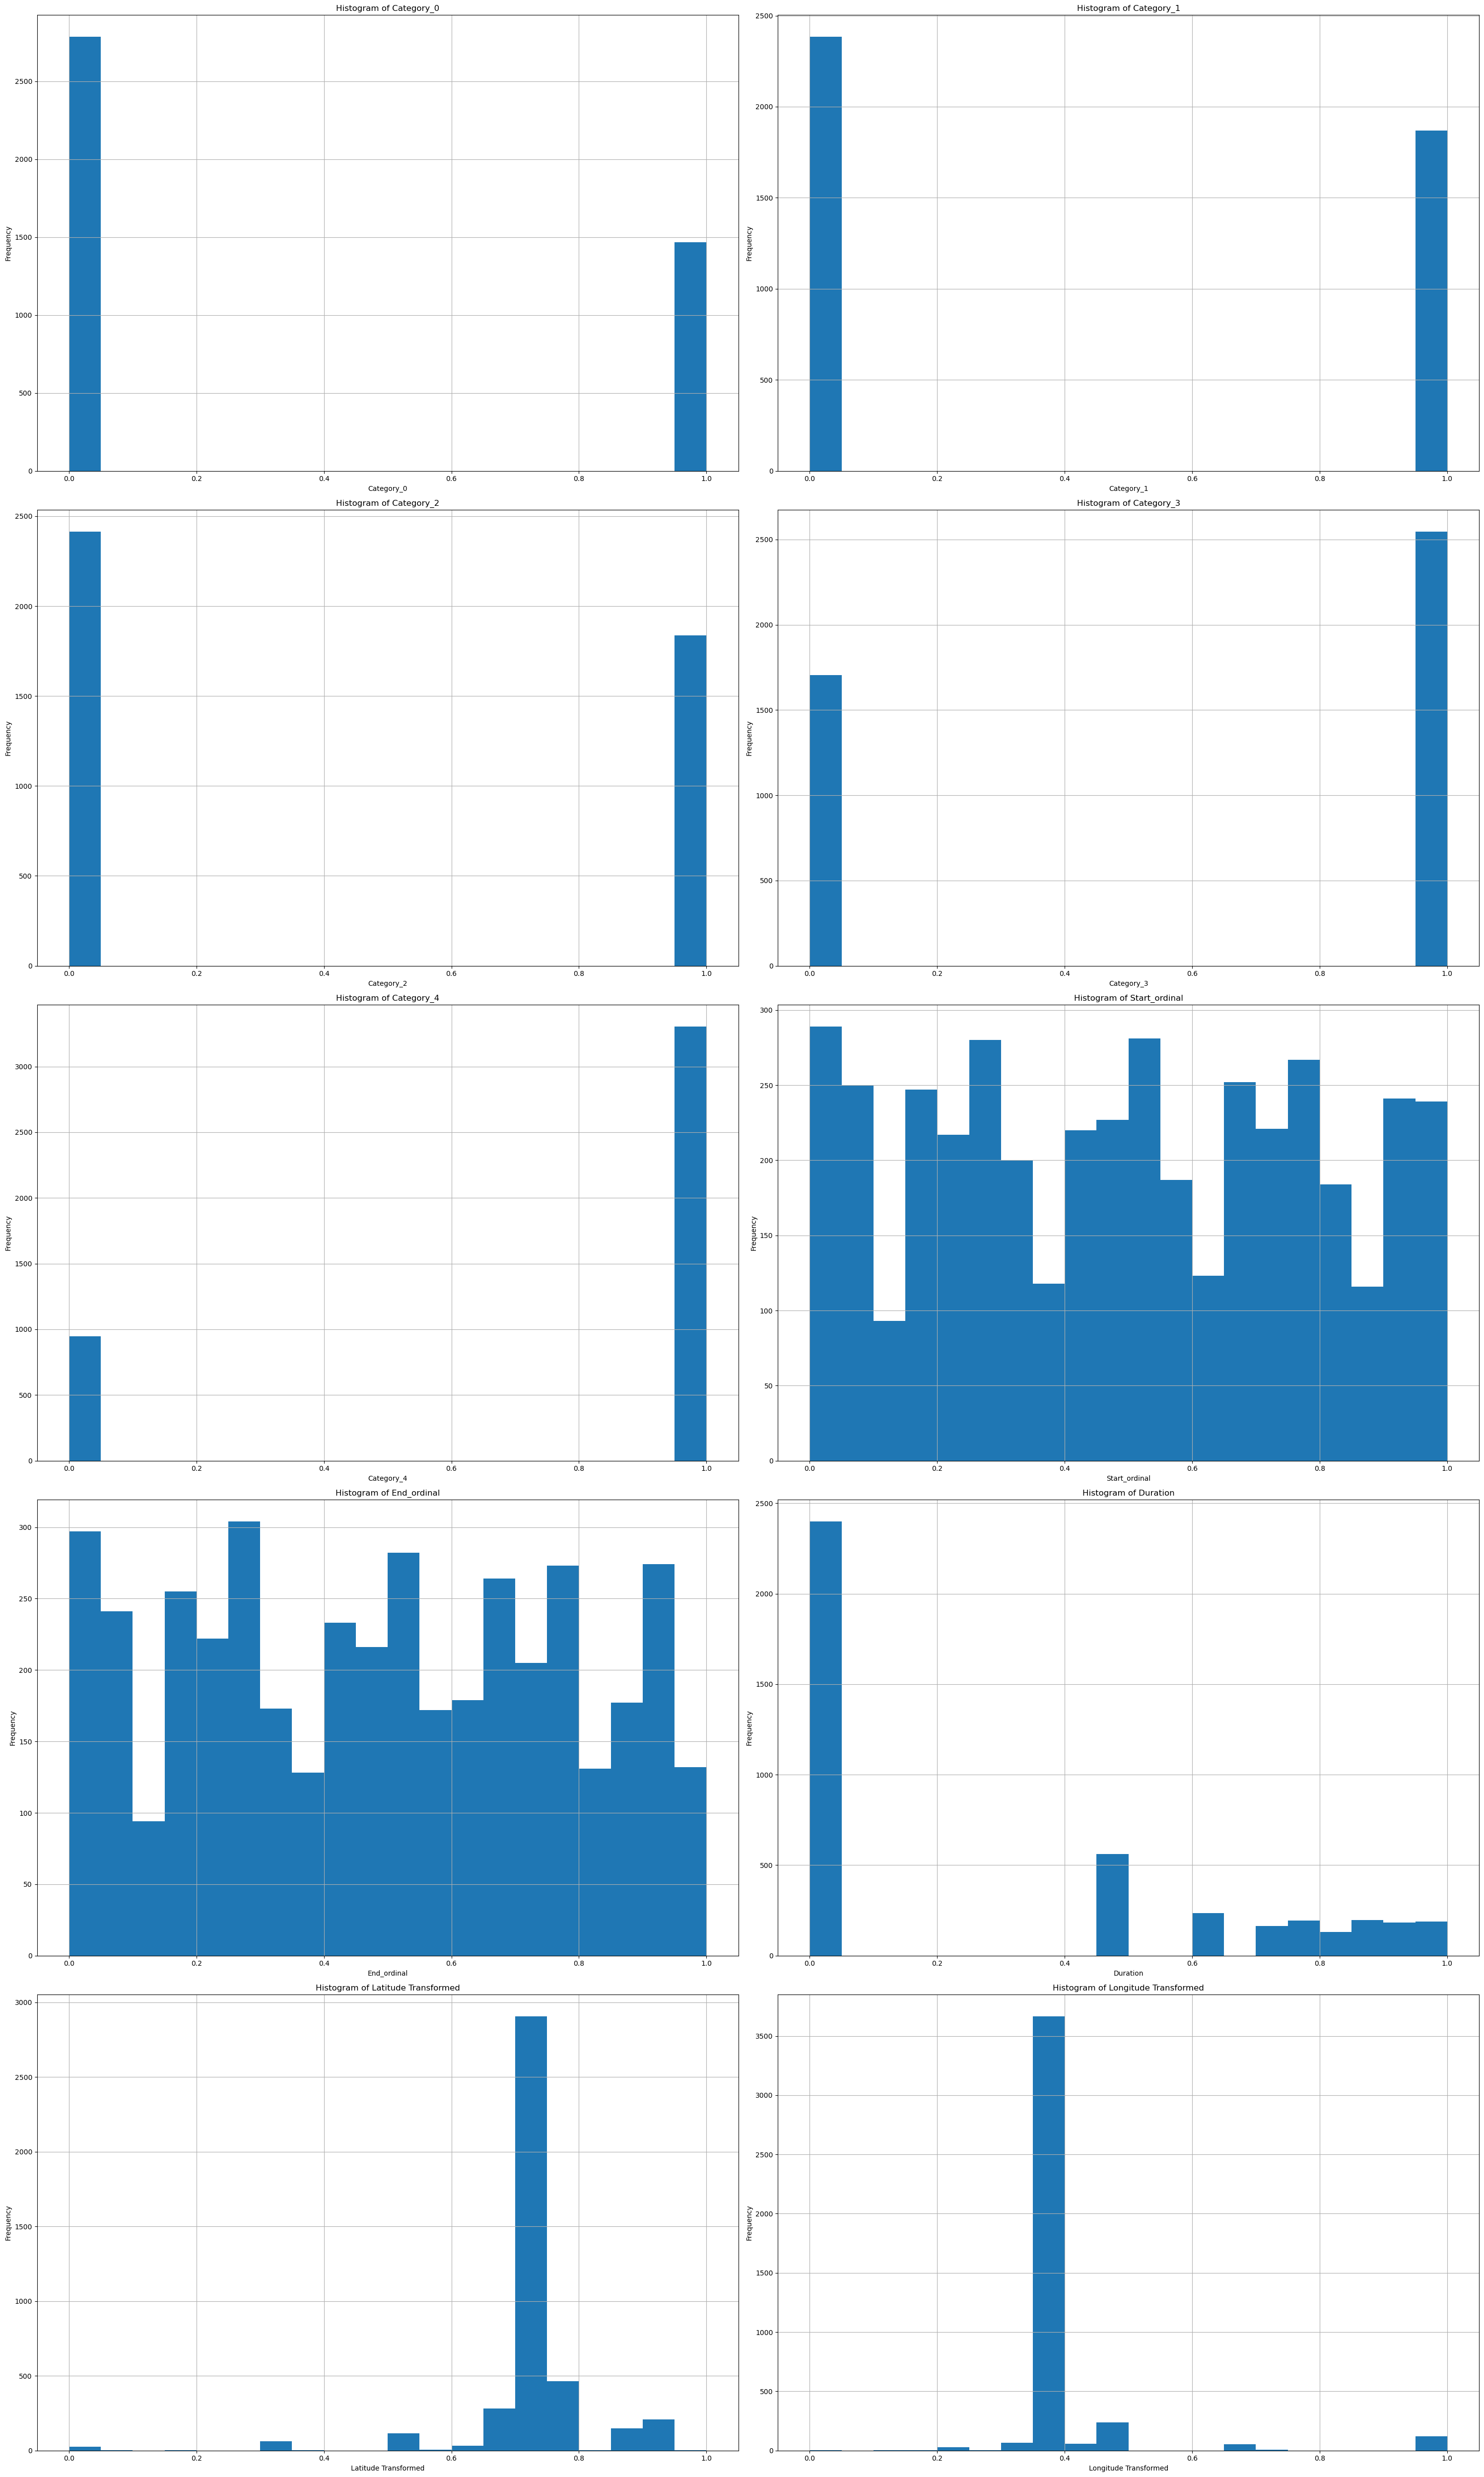

In [55]:
cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Latitude Transformed','Longitude Transformed']

fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(30, 50))
num=0
for column in cols:

    ax=axes.flatten()[num] # Adjust figure size as needed
    ax.hist(events_copy[column], bins=20)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)
    num+=1

plt.tight_layout()  # Adjust subplot layout
plt.show()

<a id='split'></a>
<b>The dataset is split into train(80%) and test(20%). The target variables are Latitude and Longitude</b>

In [56]:
X_cols=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration','Location','Category']
Y_cols=['Latitude','Longitude','Latitude Transformed','Longitude Transformed']
X_train,X_test,Y_train,Y_test=train_test_split(events_copy[X_cols],events_copy[Y_cols],test_size=0.2,random_state=100)


In [57]:
X_train.reset_index(drop=True,inplace=True)
Y_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)

<a id='ffnn'></a>
<b>Implementing Feed Forward Neural Network(FFNN) to extract train data embeddings from second last layer</b>

In [58]:
X_train.shape

(3401, 10)

In [59]:
Y_train

Latitude   Longitude  Latitude Transformed  Longitude Transformed
0    -37.850028  144.980485              0.680645               0.384436
1    -37.783751  144.961831              0.774194               0.367808
2    -37.806248  144.971232              0.741935               0.376122
3    -38.122157  145.305169              0.303226               0.672431
4    -37.806248  144.971232              0.741935               0.376122
...         ...         ...                   ...                    ...
3396 -37.821242  144.973663              0.719355               0.378118
3397 -37.825916  144.974386              0.712903               0.378783
3398 -37.798004  144.966623              0.751613               0.372132
3399 -37.810879  144.954607              0.735484               0.361157
3400 -37.812684  144.980505              0.732258               0.384436

[3401 rows x 4 columns]

<b>Defining Pearson Correlation and Euclidean distance to be used as metrics during training</b>

In [60]:
def pearson_correlation(y_true, y_pred):
    mean_true = K.mean(y_true)
    mean_pred = K.mean(y_pred)
    
    # Calculating covariance and standard deviations
    cov = K.sum((y_true - mean_true) * (y_pred - mean_pred))
    std_true = K.sqrt(K.sum((y_true - mean_true)**2))
    std_pred = K.sqrt(K.sum((y_pred - mean_pred)**2))
    
    # Calculating correlation coefficient
    correlation = cov / (std_true*std_pred)
    return correlation

def euclidean_distance(y_true, y_pred):
    # Splitting the true and predicted values into latitude and longitude components
    lat_true, lon_true = y_true[:, 0], y_true[:, 1]
    lat_pred, lon_pred = y_pred[:, 0], y_pred[:, 1]

    # Calculating the squared differences for latitude and longitude
    squared_diff_lat = K.square(lat_pred - lat_true)
    squared_diff_lon = K.square(lon_pred - lon_true)

    # Summing the squared differences and taking the square root to compute Euclidean distance
    euclidean_dist = K.sqrt(squared_diff_lat + squared_diff_lon)

    return euclidean_dist

In [61]:
cols_X=['Category_0','Category_1','Category_2','Category_3','Category_4','Start_ordinal','End_ordinal','Duration']
cols_Y=['Latitude Transformed','Longitude Transformed']

<b>Grid search with cv=3 is used to find best batch size and epoch number</b>\
The input layer is followed by 2 dense layers with 64 units, then Batch Normalization is applied, then 2 dense layers with 32 units and lastly 2 more layers with 16 units followed by the output layer. LeakyReLU is used with alpha=0.1 throughout as the activation function and Adadelta optimizer is used since it is has adaptive learning rate. Accuracy, Mean average error, Pearson's correlation and Eulidean distance are used as metrics  

In [ ]:
def create_model():
    inputs = Input(shape=(8,))
    x = Dense(64,LeakyReLU(alpha=0.1))(inputs)
    x = Dense(64,LeakyReLU(alpha=0.1))(x)
    x=BatchNormalization()(x)
    x = Dense(32,LeakyReLU(alpha=0.1))(x)
    x = Dense(32,LeakyReLU(alpha=0.1))(x)
    x = Dense(16,LeakyReLU(alpha=0.1))(x)
    x = Dense(16,LeakyReLU(alpha=0.1))(x)
    output = Dense(2)(x) 

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adadelta(), loss='mae', metrics=['accuracy','mae',pearson_correlation,euclidean_distance])#,distance_correlation
    return model

model = KerasRegressor(model=create_model)#layers=1

param_grid = {
    'batch_size': [10,15,30,40,50,60],
    'epochs': [100,150,200,250,300,350],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train[cols_X], Y_train[cols_Y],verbose=1)  

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<b> Batch size=15 and Epochs=350 were best parameters</b>

<b>FFNN model is trained using best hyperparameters</b>

In [126]:
inputs = Input(shape=(8,))
x = Dense(64,LeakyReLU(alpha=0.1))(inputs)
x = Dense(64,LeakyReLU(alpha=0.1))(x)
x=BatchNormalization()(x)

x = Dense(32,LeakyReLU(alpha=0.1))(x)
x = Dense(32,LeakyReLU(alpha=0.1))(x)
x = Dense(16,LeakyReLU(alpha=0.1))(x)
x = Dense(16,LeakyReLU(alpha=0.1))(x)
output = Dense(2)(x)
model = Model(inputs=inputs, outputs=output)

model.compile(optimizer=Adadelta(), loss='mse', metrics=['mae','accuracy',pearson_correlation,euclidean_distance])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_14 (Dense)            (None, 64)                576       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                           

<b>Early stopping with patience=5 is used for regularization and a validation split of 20% is done</b>

In [127]:
early_stopping = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
history = model.fit(X_train[cols_X], Y_train[cols_Y], epochs=350, batch_size=15, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/350
182/182 [==============================] - 1s 2ms/step - loss: 0.5668 - mae: 0.6666 - accuracy: 0.2066 - pearson_correlation: -0.4551 - euclidean_distance: 1.0443 - val_loss: 0.4066 - val_mae: 0.5910 - val_accuracy: 0.2291 - val_pearson_correlation: -0.5109 - val_euclidean_distance: 0.8963
Epoch 2/350
182/182 [==============================] - 0s 1ms/step - loss: 0.5422 - mae: 0.6504 - accuracy: 0.1890 - pearson_correlation: -0.4670 - euclidean_distance: 1.0213 - val_loss: 0.4600 - val_mae: 0.6133 - val_accuracy: 0.2188 - val_pearson_correlation: -0.4947 - val_euclidean_distance: 0.9504
Epoch 3/350
182/182 [==============================] - 0s 1ms/step - loss: 0.5228 - mae: 0.6383 - accuracy: 0.1974 - pearson_correlation: -0.4666 - euclidean_distance: 1.0033 - val_loss: 0.4986 - val_mae: 0.6269 - val_accuracy: 0.1997 - val_pearson_correlation: -0.4841 - val_euclidean_distance: 0.9844
Epoch 4/350
182/182 [==============================] - 0s 1ms/step - loss: 0.4986 - mae: 0.

Epoch 28/350
182/182 [==============================] - 0s 1ms/step - loss: 0.1694 - mae: 0.3414 - accuracy: 0.2500 - pearson_correlation: -0.2719 - euclidean_distance: 0.5585 - val_loss: 0.1616 - val_mae: 0.3347 - val_accuracy: 0.2423 - val_pearson_correlation: -0.2444 - val_euclidean_distance: 0.5472
Epoch 29/350
182/182 [==============================] - 0s 1ms/step - loss: 0.1638 - mae: 0.3348 - accuracy: 0.2522 - pearson_correlation: -0.2544 - euclidean_distance: 0.5475 - val_loss: 0.1547 - val_mae: 0.3274 - val_accuracy: 0.2555 - val_pearson_correlation: -0.2333 - val_euclidean_distance: 0.5348
Epoch 30/350
182/182 [==============================] - 0s 1ms/step - loss: 0.1560 - mae: 0.3267 - accuracy: 0.2574 - pearson_correlation: -0.2381 - euclidean_distance: 0.5340 - val_loss: 0.1474 - val_mae: 0.3189 - val_accuracy: 0.2643 - val_pearson_correlation: -0.2184 - val_euclidean_distance: 0.5213
Epoch 31/350
182/182 [==============================] - 0s 1ms/step - loss: 0.1503 - mae

182/182 [==============================] - 0s 1ms/step - loss: 0.0620 - mae: 0.1982 - accuracy: 0.7143 - pearson_correlation: 0.2474 - euclidean_distance: 0.3163 - val_loss: 0.0515 - val_mae: 0.1816 - val_accuracy: 0.7430 - val_pearson_correlation: 0.3198 - val_euclidean_distance: 0.2886
Epoch 56/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0610 - mae: 0.1957 - accuracy: 0.7515 - pearson_correlation: 0.2700 - euclidean_distance: 0.3120 - val_loss: 0.0496 - val_mae: 0.1778 - val_accuracy: 0.7533 - val_pearson_correlation: 0.3399 - val_euclidean_distance: 0.2821
Epoch 57/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0581 - mae: 0.1897 - accuracy: 0.7544 - pearson_correlation: 0.2908 - euclidean_distance: 0.3031 - val_loss: 0.0484 - val_mae: 0.1748 - val_accuracy: 0.7783 - val_pearson_correlation: 0.3574 - val_euclidean_distance: 0.2779
Epoch 58/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0572 - mae: 0.1884 - accuracy

182/182 [==============================] - 0s 1ms/step - loss: 0.0345 - mae: 0.1391 - accuracy: 0.9268 - pearson_correlation: 0.5761 - euclidean_distance: 0.2209 - val_loss: 0.0264 - val_mae: 0.1170 - val_accuracy: 0.9266 - val_pearson_correlation: 0.6543 - val_euclidean_distance: 0.1826
Epoch 83/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0336 - mae: 0.1360 - accuracy: 0.9305 - pearson_correlation: 0.5847 - euclidean_distance: 0.2157 - val_loss: 0.0262 - val_mae: 0.1165 - val_accuracy: 0.9266 - val_pearson_correlation: 0.6573 - val_euclidean_distance: 0.1816
Epoch 84/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0336 - mae: 0.1358 - accuracy: 0.9294 - pearson_correlation: 0.5877 - euclidean_distance: 0.2155 - val_loss: 0.0259 - val_mae: 0.1152 - val_accuracy: 0.9339 - val_pearson_correlation: 0.6621 - val_euclidean_distance: 0.1798
Epoch 85/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0339 - mae: 0.1374 - accuracy

182/182 [==============================] - 0s 1ms/step - loss: 0.0262 - mae: 0.1166 - accuracy: 0.9430 - pearson_correlation: 0.6764 - euclidean_distance: 0.1846 - val_loss: 0.0202 - val_mae: 0.0950 - val_accuracy: 0.9442 - val_pearson_correlation: 0.7370 - val_euclidean_distance: 0.1500
Epoch 110/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0268 - mae: 0.1187 - accuracy: 0.9478 - pearson_correlation: 0.6723 - euclidean_distance: 0.1876 - val_loss: 0.0201 - val_mae: 0.0947 - val_accuracy: 0.9442 - val_pearson_correlation: 0.7384 - val_euclidean_distance: 0.1495
Epoch 111/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0272 - mae: 0.1197 - accuracy: 0.9474 - pearson_correlation: 0.6673 - euclidean_distance: 0.1899 - val_loss: 0.0198 - val_mae: 0.0938 - val_accuracy: 0.9442 - val_pearson_correlation: 0.7418 - val_euclidean_distance: 0.1482
Epoch 112/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0272 - mae: 0.1182 - accur

182/182 [==============================] - 0s 1ms/step - loss: 0.0238 - mae: 0.1099 - accuracy: 0.9507 - pearson_correlation: 0.6966 - euclidean_distance: 0.1744 - val_loss: 0.0176 - val_mae: 0.0851 - val_accuracy: 0.9457 - val_pearson_correlation: 0.7704 - val_euclidean_distance: 0.1357
Epoch 137/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0227 - mae: 0.1072 - accuracy: 0.9507 - pearson_correlation: 0.7174 - euclidean_distance: 0.1703 - val_loss: 0.0174 - val_mae: 0.0844 - val_accuracy: 0.9471 - val_pearson_correlation: 0.7728 - val_euclidean_distance: 0.1347
Epoch 138/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0236 - mae: 0.1097 - accuracy: 0.9500 - pearson_correlation: 0.6994 - euclidean_distance: 0.1743 - val_loss: 0.0172 - val_mae: 0.0836 - val_accuracy: 0.9471 - val_pearson_correlation: 0.7746 - val_euclidean_distance: 0.1335
Epoch 139/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0239 - mae: 0.1102 - accur

182/182 [==============================] - 0s 1ms/step - loss: 0.0210 - mae: 0.1007 - accuracy: 0.9533 - pearson_correlation: 0.7317 - euclidean_distance: 0.1599 - val_loss: 0.0158 - val_mae: 0.0783 - val_accuracy: 0.9471 - val_pearson_correlation: 0.7920 - val_euclidean_distance: 0.1256
Epoch 164/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0213 - mae: 0.1013 - accuracy: 0.9511 - pearson_correlation: 0.7285 - euclidean_distance: 0.1610 - val_loss: 0.0160 - val_mae: 0.0789 - val_accuracy: 0.9471 - val_pearson_correlation: 0.7908 - val_euclidean_distance: 0.1264
Epoch 165/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0219 - mae: 0.1043 - accuracy: 0.9526 - pearson_correlation: 0.7232 - euclidean_distance: 0.1654 - val_loss: 0.0160 - val_mae: 0.0793 - val_accuracy: 0.9471 - val_pearson_correlation: 0.7905 - val_euclidean_distance: 0.1269
Epoch 166/350
182/182 [==============================] - 0s 1ms/step - loss: 0.0207 - mae: 0.1015 - accur

<b>Training and validation Loss graph</b>

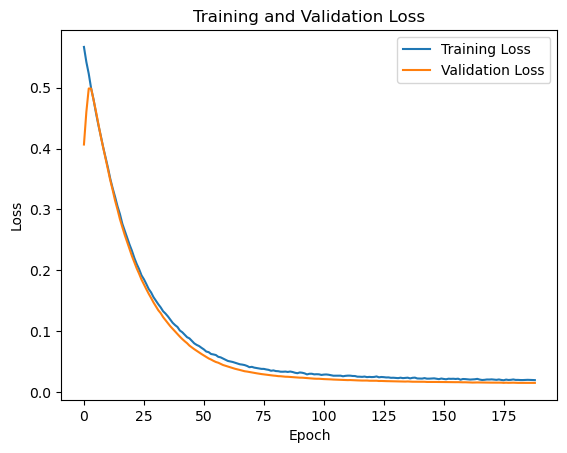

In [128]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



<b>Training and validation Accuracy graph</b>

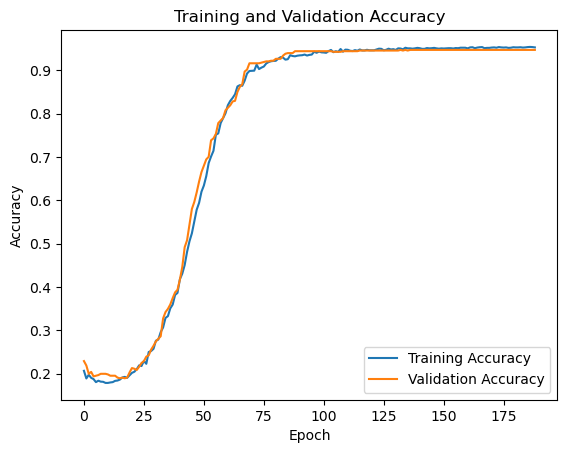

In [129]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


<b>Training and validation Mean Absolute Error graph</b>

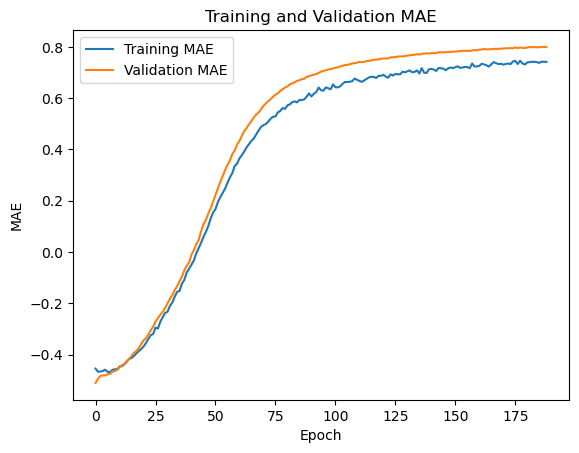

In [130]:
plt.plot(history.history['pearson_correlation'], label='Training MAE')
plt.plot(history.history['val_pearson_correlation'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

<b>Evaluating the scores<b/>

In [131]:
score = model.evaluate(X_test[cols_X],Y_test[cols_Y])
print('Test loss:', score[0])
print('Test mae:', score[1])
print('Test accuracy:', score[2])
print('Test pearson corr:', score[3])
print('Test eucledian distance:', score[4])

27/27 [==============================] - 0s 666us/step - loss: 0.0184 - mae: 0.0812 - accuracy: 0.9377 - pearson_correlation: 0.7495 - euclidean_distance: 0.1313
Test loss: 0.01836053468286991
Test mae: 0.0811738446354866
Test accuracy: 0.9377203583717346
Test pearson corr: 0.749485433101654
Test eucledian distance: 0.1313144713640213


<a id='train_embedding'></a>
<b>Creating embedding model using the FFNN till the second last layer and finding train embeddings from the train data</b>

In [132]:
embedding_model = Model(inputs=model.input, outputs=model.layers[-2].output)
train_embeddings = embedding_model.predict(X_train[cols_X])

107/107 [==============================] - 0s 471us/step


In [133]:
train_embeddings.shape

(3401, 16)

<a id='knr'></a>
<b>KNeighborsRegressor with n_neighbors=5 is fitted on the train embedding points.</b>

In [134]:
knr_events = KNeighborsRegressor(n_neighbors=5,algorithm='auto') 
knr_events.fit(train_embeddings, Y_train[cols_Y])

KNeighborsRegressor()

<b>The test embeddings are predicted using the embedding model</b>

In [135]:
test_embeddings = embedding_model.predict(X_test[cols_X])

27/27 [==============================] - 0s 471us/step


 <b>Obtaining the neighbors and neighbors' locations(locations for specific category of event) for test embeddings and finding the number of times the top locations were selected for a given event. If the test embedding's category does not match with the neigbour category then that neighbor is removed.</b> 

In [136]:
predicted={'Latitude Transformed':[],'Longitude Transformed':[]}
neighbour_dict={'Category':[],'Latitude':[],'Longitude':[],'Latitude Transformed':[],'Longitude Transformed':[],'Location':[]}
distances, indices = knr_events.kneighbors(test_embeddings)

count_dict={}

for i in range(len(test_embeddings)):
    per=0

    neighbor_indices = indices[i]
    #Using the minimum distance neighbour as the "predicted" location
    min_d=min(distances[i])
    min_ind=np.where(distances[i]==min_d)[0][0]
    predicted['Latitude Transformed'].append(Y_train.iloc[neighbor_indices[min_ind]]['Latitude Transformed'])
    predicted['Longitude Transformed'].append(Y_train.iloc[neighbor_indices[min_ind]]['Longitude Transformed'])
    
    
    for j in neighbor_indices:
        neighbour_point=X_train.iloc[j]
        if neighbour_point['Category']==X_test.iloc[i]['Category']:
            category=neighbour_point['Category']
            loc=neighbour_point['Location']

            neighbour_dict['Category'].append(category)
            neighbour_dict['Latitude'].append(Y_train.iloc[j]['Latitude'])
            neighbour_dict['Longitude'].append(Y_train.iloc[j]['Longitude'])
            neighbour_dict['Latitude Transformed'].append(Y_train.iloc[j]['Latitude Transformed'])
            neighbour_dict['Longitude Transformed'].append(Y_train.iloc[j]['Longitude Transformed'])
            neighbour_dict['Location'].append(loc)
  
            if loc in top_locations[category]:
                per+=1
    
    if category not in count_dict:
        count_dict[category]=[(per/5)*100]
    else:
        count_dict[category].append((per/5)*100)


In [137]:
print("The top locations were selected on average: ")
for i,j in count_dict.items():
    avg=round(sum(j)/len(j),2)
    percentage_in_train=round(X_train['Category'].value_counts().loc[i]/len(X_train)*100,2)
    variation=sum(location_counts['Category']==i)
    print(f"{avg}% of times under {i}-({percentage_in_train}%,{variation}) Category")

The top locations were selected on average: 
32.0% of times under Filming - Student-(1.65%,35) Category
54.4% of times under Public Event - Parade-(2.47%,29) Category
33.52% of times under Public Event - Non Ticketed-(22.02%,122) Category
60.0% of times under Public Event - Cycling-(1.76%,25) Category
42.7% of times under Filming - TVC-(7.56%,96) Category
65.66% of times under Public Event - Run/Walk-(12.53%,47) Category
69.91% of times under Promotion-(12.91%,39) Category
99.13% of times under Wedding-(14.47%,12) Category
69.47% of times under Public Event - Memorial-(2.0%,23) Category
42.3% of times under Filming - TV Series-(6.23%,66) Category
46.36% of times under Public Event - Ticketed-(4.97%,58) Category
46.36% of times under Public Event - Low Impact Activity-(2.79%,49) Category
60.0% of times under Filming - Movie-(0.62%,15) Category
51.43% of times under Filming - Other-(1.09%,28) Category
46.67% of times under Public Event - Music-(1.26%,22) Category
55.0% of times under Pub

<b>Using the predicted locations to calculate Mean squared error, Mean average error and Root mean suared error</b>

In [138]:
predicted=pd.DataFrame(predicted)
mse = mean_squared_error(Y_test[cols_Y], predicted)
mae = mean_absolute_error(Y_test[cols_Y], predicted)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

0.025778431488695182
0.07313974013631336
0.1605566301611216


<b>Creating dataframe with five neighbour locations for each event category</b>

In [139]:
neighbour_df=pd.DataFrame(neighbour_dict)
neighbour_df

Category   Latitude   Longitude  Latitude Transformed  \
0         Filming - Student -37.817189  144.964528              0.725806   
1         Filming - Student -37.816415  144.965438              0.725806   
2         Filming - Student -37.817784  144.966020              0.725806   
3         Filming - Student -37.825916  144.974386              0.712903   
4     Public Event - Parade -37.814022  144.971368              0.729032   
...                     ...        ...         ...                   ...   
4185          Filming - TVC -37.909338  144.759398              0.593548   
4186          Filming - TVC -37.815161  144.956324              0.729032   
4187          Filming - TVC -37.817593  144.957723              0.725806   
4188          Filming - TVC -37.815111  144.964045              0.729032   
4189          Filming - TVC -37.874613  144.790889              0.645161   

      Longitude Transformed                                     Location  
0                  0.370136          Flinders Lane, Melbourne, Australia  
1                  0.370801           Centre Place, Melbourne, Australia  
2                  0.371467        Campbell Arcade, Melbourne, Australia  
3                  0.378783           Kings Domain, Melbourne, Australia  
4                  0.376122         Collins Street, Melbourne, Australia  
...                     ...                                          ...  
4185               0.185900           Crombie Lane, Melbourne, Australia  
4186               0.362820         Gresham Street, Melbourne, Australia  
4187               0.364150            Church Lane, Melbourne, Australia  
4188               0.369471  Little Collins Street, Melbourne, Australia  
4189               0.214500           Queen Street, Melbourne, Australia  

[4190 rows x 6 columns]

<b>Summary of FFNN and KNR</b>\
After splitting the dataset into 80% training and 20% testing, I used a FFNN to capture the underlying patterns within the dataset. The input featues are binary encoded event categories, start date(ordinal), end date(ordinal) and duration of events. After the input layer, the model has 2 dense layers with 64 units followed by a batch normalization, 2 dense layers with 32 units, 2 dense layers with 16 units and an output layer. LeakyReLU is used as an activation fucntion in all layers with alpha=0.1. Adadelta is used as an optimizer which automatically adjust learning rate. Mean Square Error is used as loss function and Accuracy, Mean Average Error along with two custom functions Pearson's correlation and Euclidean distance are used as metrics. The Pearson's correlation and Euclidean distance will help the model to learn and minimize the difference between predicted Longitude, Latitude and train Latitude, Longitude since these features contain precise decimal values. I used grid search to find optimal batch number and epoch which were 15 and 350. During training, I used Early Stopping with patience=5 to and used a validation set of 20% to stop the model from overfitting and monitor its learning progress. The test scores are Test loss: 0.018361, Test mae: 0.081174, Test accuracy: 0.937720, Test pearson corr: 0.749485 and Test eucledian distance: 0.131314. I built an embedding model to extract the data from the second last layer of the FFNN model. I fed the extracted training data to KNR so that I can learn the intricate underlying patters and find 5 neighbors. I used the trained KNR on the extracted test data to find neighbors for each test instance. The Longitude and Latitude of the neighbors will determine the top 5 Locations suitable for each test instance. 


### Parking
I carried out various data cleaning methods:
- <a href='#parking_lat_lon'>Created Latitude and Longitude features from location column</a>
- <a href='#parking_skewness'>Corrected the skewness of data using Yeo Johnson power transformation</a> 
- <a href='#parking_standardization'>Standardized the data to follow a Normal distribution</a>
- <a href='#parking_normalization'>Scaled the data using MinMax scaling</a>

Nearest Neighbor(NN) model is trained on the parking dataset and later used on the Latitude and Longitude (transformed) columns of the above neighbour_df to find the closest 5 neighbor parking locations for each instance in neighbour_df.
- <a href='#parking_nn'>NN model is trained, 5 nearest parking locations are found and event_parking_df is created</a>
- <a href='#parking_folium'>Displayed event and parking locations on map using folium</a>

In [153]:
parking_df.head()

lastupdated           status_timestamp  zone_number  \
0  2023-12-14T04:45:34+00:00  2023-12-14T03:41:25+00:00       7695.0   
1  2023-12-14T04:45:34+00:00  2023-12-13T06:21:58+00:00       7939.0   
2  2023-12-14T23:45:34+00:00  2023-12-14T23:35:02+00:00          NaN   
3  2023-12-14T23:45:34+00:00  2023-12-14T22:39:46+00:00          NaN   
4  2023-12-18T04:45:34+00:00  2023-12-17T23:47:54+00:00       7310.0   

  status_description  kerbsideid                                 location  
0         Unoccupied       22959   -37.81844776554182, 144.95938672872117  
1         Unoccupied       10136    -37.8099909364941, 144.95263753679632  
2         Unoccupied        6527   -37.81060096851364, 144.95642622505966  
3         Unoccupied        6526  -37.810581463657826, 144.95649292476088  
4         Unoccupied        6497   -37.81044576734748, 144.95648958199024

In [154]:
parking_df.shape

(6246, 6)

In [155]:
parking_df.nunique()

lastupdated             42
status_timestamp      5872
zone_number            511
status_description       2
kerbsideid            6246
location              5875
dtype: int64

<a id='parking_lat_lon'></a>
<b>Creating Latitude and Longitude features from Location</b>

In [156]:
parking_lat=[]
parking_lon=[]

for i in parking_df['location']:
    x,y=i.split(",")
    parking_lat.append(float(x.strip()))
    parking_lon.append(float(y.strip()))

In [157]:
parking_df['Latitude']=parking_lat
parking_df['Longitude']=parking_lon
parking_df.head()

lastupdated           status_timestamp  zone_number  \
0  2023-12-14T04:45:34+00:00  2023-12-14T03:41:25+00:00       7695.0   
1  2023-12-14T04:45:34+00:00  2023-12-13T06:21:58+00:00       7939.0   
2  2023-12-14T23:45:34+00:00  2023-12-14T23:35:02+00:00          NaN   
3  2023-12-14T23:45:34+00:00  2023-12-14T22:39:46+00:00          NaN   
4  2023-12-18T04:45:34+00:00  2023-12-17T23:47:54+00:00       7310.0   

  status_description  kerbsideid                                 location  \
0         Unoccupied       22959   -37.81844776554182, 144.95938672872117   
1         Unoccupied       10136    -37.8099909364941, 144.95263753679632   
2         Unoccupied        6527   -37.81060096851364, 144.95642622505966   
3         Unoccupied        6526  -37.810581463657826, 144.95649292476088   
4         Unoccupied        6497   -37.81044576734748, 144.95648958199024   

    Latitude   Longitude  
0 -37.818448  144.959387  
1 -37.809991  144.952638  
2 -37.810601  144.956426  
3 -37.810581  144.956493  
4 -37.810446  144.956490

In [158]:
parking_df.isna().sum()

lastupdated             0
status_timestamp        0
zone_number           487
status_description      0
kerbsideid              0
location                0
Latitude                0
Longitude               0
dtype: int64

<b>Only keeping the Longitude and Latitude features</b>

In [159]:
parking_df.drop(['kerbsideid','lastupdated','status_timestamp','status_description','zone_number','location'],axis=1,inplace=True)


In [160]:
parking_df.head()

Latitude   Longitude
0 -37.818448  144.959387
1 -37.809991  144.952638
2 -37.810601  144.956426
3 -37.810581  144.956493
4 -37.810446  144.956490

<a id='parking_skewness'></a>
<b>Checking skewness</b>

In [161]:
skewness = parking_df.skew()

# Print the skewness of each variable
print("Skewness of Variables:")
print(skewness)

Skewness of Variables:
Latitude    -0.944882
Longitude    0.140344
dtype: float64


<b>Yeo Johnson power transformation is applied on neighbour_df and then parking dataset is transformed accordingly</b>

In [162]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(neighbour_df[['Latitude','Longitude']])

nlatlon=pt.transform(neighbour_df[['Latitude','Longitude']])
nlatlon=pd.DataFrame(nlatlon,columns=['Latitude Transformed','Longitude Transformed'])

yeojohnson_val_X = pt.transform(parking_df[['Latitude','Longitude']])

parking_df[['Latitude Transformed','Longitude Transformed']]=yeojohnson_val_X


parking_df

Latitude   Longitude  Latitude Transformed  Longitude Transformed
0    -37.818448  144.959387          0.000000e+00          -3.191891e-15
1    -37.809991  144.952638          1.387779e-17          -3.774758e-15
2    -37.810601  144.956426          1.387779e-17          -3.469447e-15
3    -37.810581  144.956493          1.387779e-17          -3.441691e-15
4    -37.810446  144.956490          1.387779e-17          -3.441691e-15
...         ...         ...                   ...                    ...
6241 -37.819515  144.956863          0.000000e+00          -3.413936e-15
6242 -37.814072  144.955730          1.387779e-17          -3.497203e-15
6243 -37.810033  144.962097          1.387779e-17          -2.969847e-15
6244 -37.816532  144.959193          0.000000e+00          -3.219647e-15
6245 -37.808708  144.966605          2.775558e-17          -2.581269e-15

[6246 rows x 4 columns]

In [163]:
skewness = parking_df[['Latitude','Longitude','Latitude Transformed','Longitude Transformed']].skew()

# Print the skewness of each variable
print("Skewness of Variables:")
print(skewness)

Skewness of Variables:
Latitude                -0.944882
Longitude                0.140344
Latitude Transformed     0.000000
Longitude Transformed    0.000000
dtype: float64


<a id='parking_standardization'></a>
<b>Standardization is applied on neighbour_df and then parking dataset is transformed accordingly</b>

In [164]:
standard_scaler = StandardScaler()

standard_scaler.fit(nlatlon)
nlatlon[['Latitude Transformed','Longitude Transformed']]=standard_scaler.transform(nlatlon)

scaled=standard_scaler.transform(parking_df[['Latitude Transformed','Longitude Transformed']])

parking_df[['Latitude Transformed','Longitude Transformed']]=scaled
parking_df

Latitude   Longitude  Latitude Transformed  Longitude Transformed
0    -37.818448  144.959387             -0.004145              -0.291873
1    -37.809991  144.952638              0.085832              -0.344849
2    -37.810601  144.956426              0.085832              -0.317099
3    -37.810581  144.956493              0.085832              -0.314577
4    -37.810446  144.956490              0.085832              -0.314577
...         ...         ...                   ...                    ...
6241 -37.819515  144.956863             -0.004145              -0.312054
6242 -37.814072  144.955730              0.085832              -0.319622
6243 -37.810033  144.962097              0.085832              -0.271691
6244 -37.816532  144.959193             -0.004145              -0.294395
6245 -37.808708  144.966605              0.175809              -0.236374

[6246 rows x 4 columns]

<a id='parking_scaling'></a>
<b>MinMax scaling is applied on neighbour_df and then parking dataset is transformed accordingly</b>

In [165]:
minmax_scaler=MinMaxScaler()

minmax_scaler.fit(nlatlon)
nlatlon[['Latitude Transformed','Longitude Transformed']]=minmax_scaler.transform(nlatlon)

scaled = minmax_scaler.transform(parking_df[['Latitude Transformed','Longitude Transformed']])
parking_df[['Latitude Transformed','Longitude Transformed']]=scaled

parking_df

Latitude   Longitude  Latitude Transformed  Longitude Transformed
0    -37.818448  144.959387              0.761905               0.365594
1    -37.809991  144.952638              0.771429               0.359563
2    -37.810601  144.956426              0.771429               0.362723
3    -37.810581  144.956493              0.771429               0.363010
4    -37.810446  144.956490              0.771429               0.363010
...         ...         ...                   ...                    ...
6241 -37.819515  144.956863              0.761905               0.363297
6242 -37.814072  144.955730              0.771429               0.362435
6243 -37.810033  144.962097              0.771429               0.367892
6244 -37.816532  144.959193              0.761905               0.365307
6245 -37.808708  144.966605              0.780952               0.371913

[6246 rows x 4 columns]

In [166]:
parking_df.head()

Latitude   Longitude  Latitude Transformed  Longitude Transformed
0 -37.818448  144.959387              0.761905               0.365594
1 -37.809991  144.952638              0.771429               0.359563
2 -37.810601  144.956426              0.771429               0.362723
3 -37.810581  144.956493              0.771429               0.363010
4 -37.810446  144.956490              0.771429               0.363010

<a id='parking_nn'></a>
<b>NearestNeighbors Algorithm to find 5 neighbors(parking locations) for each event record</b><br>
Here, the 5 neighbors for a given test record will determine the 5 closest parking locations given the longitude and latitude of an event location

In [167]:
knn_model_parking = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model_parking.fit(parking_df[['Latitude Transformed','Longitude Transformed']])

NearestNeighbors()

In [168]:
cols=['Latitude Transformed','Longitude Transformed']
distances, indices = knn_model_parking.kneighbors(neighbour_df[cols])

geolocator = Nominatim(user_agent="parking_locator",timeout=5)

parking_neighbour_dict={'Event Category':[],'Event Location':[],'Event Latitude':[],'Event Longitude':[],'Parking Location':[],'Parking Latitude':[],'Parking Longitude':[],'Latitude Transformed':[],'Longitude Transformed':[]}

for i in range(len(neighbour_df)):
    neighbour_indices = indices[i]
    for j in range(len(neighbour_indices)):
        #Each neighbor point(parking spot) is obtained for every neighbour_scaled_df record
        parking_neighbour=parking_df.iloc[neighbour_indices[j]]
        parking_lat=parking_neighbour['Latitude']
        parking_lon=parking_neighbour['Longitude']
        if parking_lat in parking_neighbour_dict['Parking Latitude'] and parking_lon in parking_neighbour_dict['Parking Longitude']:
            ind=parking_neighbour_dict['Parking Latitude'].index(parking_lat)
            loc=parking_neighbour_dict['Parking Location'][ind]
            parking_neighbour_dict['Parking Location'].append(loc)
        else:
            try:
                location = geolocator.reverse((parking_lat, parking_lon), exactly_one=True)
                if location:
                    parking_neighbour_dict['Parking Location'].append(location.address)
        
            except Exception as e:
                print(f"Error: {e}")
        parking_neighbour_dict['Parking Latitude'].append(parking_lat)
        parking_neighbour_dict['Parking Longitude'].append(parking_lon)

        parking_neighbour_dict['Event Location'].append(neighbour_df['Location'].iloc[i])
        parking_neighbour_dict['Event Category'].append(neighbour_df['Category'].iloc[i])
        parking_neighbour_dict['Event Latitude'].append(neighbour_df['Latitude'].iloc[i])
        parking_neighbour_dict['Event Longitude'].append(neighbour_df['Longitude'].iloc[i])
        parking_neighbour_dict['Latitude Transformed'].append(neighbour_df['Latitude Transformed'].iloc[i])
        parking_neighbour_dict['Longitude Transformed'].append(neighbour_df['Longitude Transformed'].iloc[i])
            
        

event_parking_df=pd.DataFrame(parking_neighbour_dict)  
event_parking_df.head()


Event Category                       Event Location  Event Latitude  \
0  Filming - Student  Flinders Lane, Melbourne, Australia      -37.817189   
1  Filming - Student  Flinders Lane, Melbourne, Australia      -37.817189   
2  Filming - Student  Flinders Lane, Melbourne, Australia      -37.817189   
3  Filming - Student  Flinders Lane, Melbourne, Australia      -37.817189   
4  Filming - Student  Flinders Lane, Melbourne, Australia      -37.817189   

   Event Longitude                                   Parking Location  \
0       144.964528  Commercial Road, Melbourne, City of Melbourne,...   
1       144.964528  Commercial Road, Melbourne, City of Melbourne,...   
2       144.964528  Commercial Road, Melbourne, City of Melbourne,...   
3       144.964528  Alfred Hospital, 55, Commercial Road, Melbourn...   
4       144.964528  Alfred Hospital, 55, Commercial Road, Melbourn...   

   Parking Latitude  Parking Longitude  Latitude Transformed  \
0        -37.845062         144.979593              0.725806   
1        -37.844852         144.979409              0.725806   
2        -37.845098         144.979863              0.725806   
3        -37.844887         144.979674              0.725806   
4        -37.844895         144.979736              0.725806   

   Longitude Transformed  
0               0.370136  
1               0.370136  
2               0.370136  
3               0.370136  
4               0.370136

<b>The event_parking_df contains the information of all events and the 8 most likely locations they should take place along with the 5 closest parking spot locations around each event.</b>

In [169]:
event_parking_df.drop_duplicates(keep='first', inplace=True)
event_parking_df.tail(8)

Event Category                        Event Location  Event Latitude  \
20767  Filming - Other   Bourke Street, Melbourne, Australia      -37.724829   
20768  Filming - Other   Bourke Street, Melbourne, Australia      -37.724829   
20769  Filming - Other   Bourke Street, Melbourne, Australia      -37.724829   
20930    Filming - TVC  Gresham Street, Melbourne, Australia      -37.815161   
20931    Filming - TVC  Gresham Street, Melbourne, Australia      -37.815161   
20932    Filming - TVC  Gresham Street, Melbourne, Australia      -37.815161   
20933    Filming - TVC  Gresham Street, Melbourne, Australia      -37.815161   
20934    Filming - TVC  Gresham Street, Melbourne, Australia      -37.815161   

       Event Longitude                                   Parking Location  \
20767       144.992219  71, Kay Street, Carlton, Melbourne, City of Me...   
20768       144.992219  65, Kay Street, Carlton, Melbourne, City of Me...   
20769       144.992219  69, Kay Street, Carlton, Melbourne, City of Me...   
20930       144.956324  Commercial Road, Melbourne, City of Melbourne,...   
20931       144.956324  Commercial Road, Melbourne, City of Melbourne,...   
20932       144.956324  Commercial Road, Melbourne, City of Melbourne,...   
20933       144.956324  Alfred Hospital, 55, Commercial Road, Melbourn...   
20934       144.956324  Alfred Hospital, 55, Commercial Road, Melbourn...   

       Parking Latitude  Parking Longitude  Latitude Transformed  \
20767        -37.795229         144.972583              0.858065   
20768        -37.795246         144.972737              0.858065   
20769        -37.795239         144.972674              0.858065   
20930        -37.845062         144.979593              0.729032   
20931        -37.844852         144.979409              0.729032   
20932        -37.845098         144.979863              0.729032   
20933        -37.844887         144.979674              0.729032   
20934        -37.844895         144.979736              0.729032   

       Longitude Transformed  
20767               0.394746  
20768               0.394746  
20769               0.394746  
20930               0.362820  
20931               0.362820  
20932               0.362820  
20933               0.362820  
20934               0.362820

In [170]:
event_parking_df.reset_index(drop=True,inplace=True)

In [171]:
event_parking_df.shape

(2735, 9)

<a id='parking_folium'></a>
<b>Displaying the event locations and parking locations based on event categories using folium</b>

In [172]:
def display_event_parking(event_name):

    plotted_coordinates=[]
    plotted_name=[]

    filtered_df = event_parking_df[event_parking_df['Event Category'] == event_name]
    m = folium.Map(location=[event_parking_df['Event Latitude'].mean(), event_parking_df['Event Longitude'].mean()], zoom_start=10)
    legend_html = """
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 70px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity: 0.8;">
          <p style="text-align:center; margin: 0;"><strong>Legend</strong></p>
          <p style="margin: 0;">Event Location: <span style="color:lightblue">&#9679;</span></p>
          <p style="margin: 0;">Parking Location: <span style="color:green">&#9679;</span></p>
    </div>
    """
    
    # Add legend HTML to the map
    m.get_root().html.add_child(folium.Element(legend_html))
    
    title_html = """
    <h3 style="text-align: center; margin: 10px 0;">Event and Parking Locations</h3>
    """
    m.get_root().html.add_child(folium.Element(title_html))

    for idx, row in filtered_df.iterrows():
        
        coordinates = (row['Event Latitude'], row['Event Longitude'])
        if coordinates not in plotted_coordinates and row['Event Location'] not in plotted_name:
            folium.Marker(coordinates, popup=row['Event Location'], icon=folium.Icon(color='blue')).add_to(m)
            plotted_coordinates.append(coordinates)
            plotted_name.append(row['Event Location'])

    # Adding markers for parking locations
    for idx, row in filtered_df.iterrows():
        coordinates = (row['Parking Latitude'], row['Parking Longitude'])
        if coordinates not in plotted_coordinates:
            folium.Marker(coordinates,popup=row['Parking Location'], icon=folium.Icon(color='green')).add_to(m)
            plotted_coordinates.append(coordinates)
    display(m)

# Creating search box widget
event_search_box = widgets.Dropdown(options=event_parking_df['Event Category'].unique(), description='Event Category:')
interact(display_event_parking, event_name=event_search_box)


interactive(children=(Dropdown(description='Event Category:', options=('Filming - Student', 'Public Event - Pa…

<function __main__.display_event_parking(event_name)>

<b>The events are displayed using blue colored markers and the parking spots are displayed using green colored markers.</b>

### Banner
I carried out various data cleaning methods:
- <a href='#banner_nan'>Handled missing values and saved banner pole type and corresponding descritption in a dictionary</a>
- <a href='#banner_skewness'>Corrected the skewness of data using Yeo Johnson power transformation</a> 
- <a href='#banner_standardization'>Standardized the data to follow a Normal distribution</a>
- <a href='#banner_normalization'>Scaled the data using MinMax scaling</a>

Nearest Neighbor(NN) model is trained on the Latitude and Longitude (transformed) of banner dataset and later used on the Latitude and Longitude (transformed) columns of the above event_parking_df to find the closest 5 neighbor banner locations for each instance in event_parking_df. The final dataset event_parking_banner_df contains the complete information of all events and the 5 most likely locations they should take place, the 5 closest parking locations for each event and also the 5 closest banner spots for promoting each event.
- <a href='#banner_nn'>NN model is trained, 5 nearest banner locations are found and the final event_parking_df dataframe is created</a>
- <a href='#banner_folium'>Displayed event, parking and banner locations on map using folium</a>

In [179]:
banner_df.head()

asset_number                                  asset_description  \
0       1110368  Standard Banner Pole - Lansdowne St: Wellingto...   
1       1110057                    Banner Pole - Super Banner Pole   
2       1110093                    Banner Pole - Super Banner Pole   
3       1110096                    Banner Pole - Super Banner Pole   
4       1110108                    Banner Pole - Super Banner Pole   

   banner_pole_type  book_group             model_descr_lupvalue  \
0               6.0        62.0    Banner Pole - Standard Banner   
1               2.0        79.0  Banner Pole - Super Banner Pole   
2               2.0        59.0  Banner Pole - Super Banner Pole   
3               2.0        59.0  Banner Pole - Super Banner Pole   
4               2.0        59.0  Banner Pole - Super Banner Pole   

  model_no_lupvalue        lat         lon  \
0        310101-004 -37.814268  144.977428   
1        310101-001 -37.809428  144.966548   
2        310101-001 -37.800985  144.957241   
3        310101-001 -37.800974  144.957269   
4        310101-001 -37.801019  144.957138   

                                  location  
0   -37.81426836404757, 144.97742756833915  
1   -37.80942811378078, 144.96654780374206  
2    -37.80098530840636, 144.9572409533404  
3   -37.80097426523944, 144.95726931044308  
4  -37.801019397609785, 144.95713847866782

In [180]:
banner_df.shape

(859, 9)

In [181]:
banner_df.nunique()

asset_number            859
asset_description        85
banner_pole_type          6
book_group              104
model_descr_lupvalue      5
model_no_lupvalue         5
lat                     859
lon                     859
location                859
dtype: int64

In [182]:
banner_df.isna().sum()

asset_number             0
asset_description        0
banner_pole_type         3
book_group               3
model_descr_lupvalue    46
model_no_lupvalue       46
lat                      0
lon                      0
location                 0
dtype: int64

<a id='banner_nan'></a>
<b>'model_no_lupvalue' feature and 'model_descr_lupvalue' feature are null together</b>

In [183]:
banner_df[banner_df['model_no_lupvalue'].isna()]

asset_number                                  asset_description  \
32        1581126  Standard Banner Pole - William Street between ...   
44        1110333     Super Banner Pole Brackets - Town Hall Portico   
54        1110842     Super Banner Pole Brackets - Town Hall Portico   
77        1110698  Catenary Banner - Little Bourke St (Chinatown)...   
84        1110154  Catenary Banner - Little Bourke St (Chinatown)...   
87        1110596  Catenary Banner - Little Bourke St (Chinatown)...   
89        1581125  Standard Banner Pole - Niagara Lane between Lo...   
95        1110151  Catenary Banner - Little Bourke St (Chinatown)...   
97        1110591  Catenary Banner - Little Bourke St (Chinatown)...   
119       1110152  Catenary Banner - Little Bourke St (Chinatown)...   
128       1110690  Catenary Banner - Little Bourke St (Chinatown)...   
159       1110590  Catenary Banner - Little Bourke St (Chinatown)...   
204       1110694  Catenary Banner - Little Bourke St (Chinatown)...   
294       1110599  Catenary Banner - Little Bourke St (Chinatown)...   
306       1110153  Catenary Banner - Little Bourke St (Chinatown)...   
371       1110841     Super Banner Pole Brackets - Town Hall Portico   
374       1110594  Catenary Banner - Little Bourke St (Chinatown)...   
375       1110593  Catenary Banner - Little Bourke St (Chinatown)...   
381       1110592  Catenary Banner - Little Bourke St (Chinatown)...   
413       1110600  Catenary Banner - Little Bourke St (Chinatown)...   
417       1110597  Catenary Banner - Little Bourke St (Chinatown)...   
423       1110697  Catenary Banner - Little Bourke St (Chinatown)...   
424       1110691  Catenary Banner - Little Bourke St (Chinatown)...   
434       1110585  Catenary Banner - Little Bourke St (Chinatown)...   
435       1110840     Super Banner Pole Brackets - Town Hall Portico   
443       1110701  Catenary Banner - Little Bourke St (Chinatown)...   
455       1110150     Super Banner Pole Brackets - Town Hall Portico   
456       1110586  Catenary Banner - Little Bourke St (Chinatown)...   
466       1581127  Standard Banner Pole - Swanston Street between...   
527       1110695  Catenary Banner - Little Bourke St (Chinatown)...   
533       1110601  Catenary Banner - Little Bourke St (Chinatown)...   
561       1110588  Catenary Banner - Little Bourke St (Chinatown)...   
581       1110696  Catenary Banner - Little Bourke St (Chinatown)...   
594       1110458  Catenary Banner - Little Bourke St (Chinatown)...   
596       1110589  Catenary Banner - Little Bourke St (Chinatown)...   
634       1110598  Catenary Banner - Little Bourke St (Chinatown)...   
678       1109884  Catenary Banner - Little Bourke St (Chinatown)...   
719       1110692  Catenary Banner - Little Bourke St (Chinatown)...   
729       1110131     Super Banner Pole Brackets - Town Hall Portico   
745       1110693  Catenary Banner - Little Bourke St (Chinatown)...   
758       1110595  Catenary Banner - Little Bourke St (Chinatown)...   
815       1110700  Catenary Banner - Little Bourke St (Chinatown)...   
821       1110602  Catenary Banner - Little Bourke St (Chinatown)...   
822       1110839     Super Banner Pole Brackets - Town Hall Portico   
823       1110699  Catenary Banner - Little Bourke St (Chinatown)...   
829       1110587  Catenary Banner - Little Bourke St (Chinatown)...   

     banner_pole_type  book_group model_descr_lupvalue model_no_lupvalue  \
32                6.0        19.0                  NaN               NaN   
44                7.0        28.0                  NaN               NaN   
54                7.0        28.0                  NaN               NaN   
77                8.0       117.0                  NaN               NaN   
84                8.0       117.0                  NaN               NaN   
87                8.0        18.0                  NaN               NaN   
89                6.0        19.0                  NaN               NaN   
95          

<b>Checking the 'model_descr_lupvalue' for each 'banner_pole_type'</b>

In [184]:
banner_df['banner_pole_type'].value_counts()

banner_pole_type
6.0    378
2.0    362
4.0     59
8.0     36
5.0     14
7.0      7
Name: count, dtype: int64

In [185]:
print(banner_df.loc[banner_df['banner_pole_type']==6.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==2.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==4.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==8.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==5.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==7.0,'model_descr_lupvalue'].unique())

['Banner Pole - Standard Banner' nan]
['Banner Pole - Super Banner Pole' 'Banner Pole - Spinner'
 'Banner Pole - Standard Banner']
['Banner Pole - Type 1 - Docklands']
[nan]
['Banner Pole - Type 2 - Docklands']
[nan]


<b>Replacing the nan valus for 7.0 and 8.0 banner_pole_type using the first part of the asset_description</b>

In [186]:
banner_df['model_descr_lupvalue']=banner_df.apply(lambda row: row['asset_description'].split(' - ')[0] if row['banner_pole_type']==7.0 else row['model_descr_lupvalue'], axis=1)


In [187]:
banner_df['model_descr_lupvalue']=banner_df.apply(lambda row: row['asset_description'].split(' - ')[0] if row['banner_pole_type']==8.0 else row['model_descr_lupvalue'], axis=1)


<b>6.0 banner_pole_type is always Standard Banner</b>

In [188]:
banner_df['model_descr_lupvalue'].fillna('Banner Pole - Standard Banner',inplace=True)

In [189]:
print(banner_df.loc[banner_df['banner_pole_type']==6.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==2.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==4.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==8.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==5.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==7.0,'model_descr_lupvalue'].unique())

['Banner Pole - Standard Banner']
['Banner Pole - Super Banner Pole' 'Banner Pole - Spinner'
 'Banner Pole - Standard Banner']
['Banner Pole - Type 1 - Docklands']
['Catenary Banner']
['Banner Pole - Type 2 - Docklands']
['Super Banner Pole Brackets']


<b>Checking banner_pole_type=2.0 with a Standard Banner model_descr_lupvalue which does not match with asset_description</b>

In [190]:
banner_df[(banner_df['banner_pole_type']==2.0) & (banner_df['model_descr_lupvalue']=='Banner Pole - Standard Banner')]


asset_number                                  asset_description  \
195       1109886  Super Banner Pole - Bourke St: Exhibition St -...   

     banner_pole_type  book_group           model_descr_lupvalue  \
195               2.0         7.0  Banner Pole - Standard Banner   

    model_no_lupvalue       lat         lon  \
195        310101-004 -37.81263  144.968421   

                                   location  
195  -37.812629612297506, 144.9684207947835

In [191]:
banner_df.iloc[195,[4,5]]=['Banner Pole - Super Banner Pole','310101-001']

In [192]:
print(banner_df.loc[banner_df['banner_pole_type']==6.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==2.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==4.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==8.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==5.0,'model_descr_lupvalue'].unique())
print(banner_df.loc[banner_df['banner_pole_type']==7.0,'model_descr_lupvalue'].unique())

['Banner Pole - Standard Banner']
['Banner Pole - Super Banner Pole' 'Banner Pole - Spinner']
['Banner Pole - Type 1 - Docklands']
['Catenary Banner']
['Banner Pole - Type 2 - Docklands']
['Super Banner Pole Brackets']


<b>Saving the 'banner_pole_type' and description in a dictionary</b>

In [193]:
banner_name_dict={6.0:['Banner Pole - Standard Banner'],2.0:['Banner Pole - Super Banner Pole' 'Banner Pole - Spinner'],4.0:['Banner Pole - Type 1 - Docklands'],5.0:['Banner Pole - Type 2 - Docklands'],7.0:['Super Banner Pole Brackets'],8.0:['Catenary Banner']}

<b>Keeping only the banner_pole_type, lat and lon features</b>

In [194]:
banner_df.drop(['asset_number','asset_description','book_group','model_descr_lupvalue','model_no_lupvalue','location'],axis=1,inplace=True)
banner_df.head()

banner_pole_type        lat         lon
0               6.0 -37.814268  144.977428
1               2.0 -37.809428  144.966548
2               2.0 -37.800985  144.957241
3               2.0 -37.800974  144.957269
4               2.0 -37.801019  144.957138

In [195]:
banner_df.columns=['Banner Pole Type','Latitude','Longitude']

<a id='banner_skewness'></a>
<b>Checking skewness</b>

In [196]:
skewness = banner_df.skew()

# Print the skewness of each variable
print("Skewness of Variables:")
print(skewness)

Skewness of Variables:
Banner Pole Type   -0.001534
Latitude           -0.579134
Longitude          -0.415170
dtype: float64


<a id='banner_skewness'></a>
<b>Yeo Johnson power transformation is applied on event_parking_df and then banner dataset is transformed accordingly</b>

In [197]:
pt = PowerTransformer(method='yeo-johnson')

nlatlon=event_parking_df[['Event Latitude','Event Longitude']]
nlatlon.columns=['Latitude','Longitude']

pt.fit(nlatlon)
nlatlon=pt.transform(nlatlon)
nlatlon=pd.DataFrame(nlatlon,columns=['Latitude Transformed','Longitude Transformed'])

yeojohnson_val_X = pt.transform(banner_df[['Latitude','Longitude']])

banner_df[['Latitude Transformed','Longitude Transformed']]=yeojohnson_val_X


banner_df

Banner Pole Type   Latitude   Longitude  Latitude Transformed  \
0                 6.0 -37.814268  144.977428          2.775558e-17   
1                 2.0 -37.809428  144.966548          5.551115e-17   
2                 2.0 -37.800985  144.957241          9.714451e-17   
3                 2.0 -37.800974  144.957269          9.714451e-17   
4                 2.0 -37.801019  144.957138          9.714451e-17   
..                ...        ...         ...                   ...   
854               6.0 -37.806699  144.973230          6.938894e-17   
855               6.0 -37.814527  144.961874          2.775558e-17   
856               2.0 -37.812790  144.942418          4.163336e-17   
857               2.0 -37.806737  144.965891          6.938894e-17   
858               2.0 -37.802169  144.966799          9.714451e-17   

     Longitude Transformed  
0            -1.304512e-15  
1            -2.414735e-15  
2            -3.386180e-15  
3            -3.386180e-15  
4            -3.386180e-15  
..                     ...  
854          -1.720846e-15  
855          -2.914335e-15  
856          -4.912737e-15  
857          -2.498002e-15  
858          -2.386980e-15  

[859 rows x 5 columns]

In [198]:
skewness = banner_df.skew()

# Print the skewness of each variable
print("Skewness of Variables:")
print(skewness)

Skewness of Variables:
Banner Pole Type        -0.001534
Latitude                -0.579134
Longitude               -0.415170
Latitude Transformed     0.000000
Longitude Transformed    0.000000
dtype: float64


<a id='banner_standardization'></a>
<b>Standardization is applied on event_parking_df and then banner dataset is transformed accordingly</b>

In [199]:
standard_scaler = StandardScaler()

standard_scaler.fit(nlatlon)
nlatlon[['Latitude Transformed','Longitude Transformed']]=standard_scaler.transform(nlatlon)

scaled=standard_scaler.transform(banner_df[['Latitude Transformed','Longitude Transformed']])

banner_df[['Latitude Transformed','Longitude Transformed']]=scaled
banner_df

Banner Pole Type   Latitude   Longitude  Latitude Transformed  \
0                 6.0 -37.814268  144.977428              0.061068   
1                 2.0 -37.809428  144.966548              0.130014   
2                 2.0 -37.800985  144.957241              0.233432   
3                 2.0 -37.800974  144.957269              0.233432   
4                 2.0 -37.801019  144.957138              0.233432   
..                ...        ...         ...                   ...   
854               6.0 -37.806699  144.973230              0.164486   
855               6.0 -37.814527  144.961874              0.061068   
856               2.0 -37.812790  144.942418              0.095541   
857               2.0 -37.806737  144.965891              0.164486   
858               2.0 -37.802169  144.966799              0.233432   

     Longitude Transformed  
0                -0.104671  
1                -0.193542  
2                -0.271304  
3                -0.271304  
4                -0.271304  
..                     ...  
854              -0.137997  
855              -0.233534  
856              -0.393501  
857              -0.200207  
858              -0.191320  

[859 rows x 5 columns]

<a id='banner_scaling'></a>
<b>MinMax scaling is applied on event_parking_df and then banner dataset is transformed accordingly</b>

In [200]:
minmax_scaler=MinMaxScaler()

minmax_scaler.fit(nlatlon)
nlatlon[['Latitude Transformed','Longitude Transformed']]=minmax_scaler.transform(nlatlon)

scaled = minmax_scaler.transform(banner_df[['Latitude Transformed','Longitude Transformed']])
banner_df[['Latitude Transformed','Longitude Transformed']]=scaled

banner_df

Banner Pole Type   Latitude   Longitude  Latitude Transformed  \
0                 6.0 -37.814268  144.977428              0.769912   
1                 2.0 -37.809428  144.966548              0.778761   
2                 2.0 -37.800985  144.957241              0.792035   
3                 2.0 -37.800974  144.957269              0.792035   
4                 2.0 -37.801019  144.957138              0.792035   
..                ...        ...         ...                   ...   
854               6.0 -37.806699  144.973230              0.783186   
855               6.0 -37.814527  144.961874              0.769912   
856               2.0 -37.812790  144.942418              0.774336   
857               2.0 -37.806737  144.965891              0.783186   
858               2.0 -37.802169  144.966799              0.792035   

     Longitude Transformed  
0                 0.381608  
1                 0.371953  
2                 0.363505  
3                 0.363505  
4                 0.363505  
..                     ...  
854               0.377987  
855               0.367608  
856               0.350229  
857               0.371229  
858               0.372194  

[859 rows x 5 columns]

<a id='banner_nn'></a>
<b>NearestNeighbors Algorithm to find 5 neighbors(banner locations) for each event record</b><br>
Here the 5 nearest neighbours will determine the 5 closest banner spots for any given event longitude and latitude given for promotional activities.


In [201]:
knn_model_banner = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model_banner.fit(banner_df[['Latitude Transformed','Longitude Transformed']])

NearestNeighbors()

In [202]:
distances, indices = knn_model_banner.kneighbors(event_parking_df[['Latitude Transformed','Longitude Transformed']])

geolocator = Nominatim(user_agent="banner_locator",timeout=5)


banner_neighbour_dict={'Event Category':[],'Event Location':[],'Event Latitude':[],'Event Longitude':[],'Parking Location':[],'Parking Latitude':[],'Parking Longitude':[],'Banner Pole Type':[],'Banner Latitude':[],'Banner Longitude':[],'Banner Location':[]}

for i in range(len(event_parking_df)):
    neighbour_indices = indices[i]

    for j in range(len(neighbour_indices)):
        banner_neighbour=banner_df.iloc[neighbour_indices[j]]
        banner_lat=banner_neighbour['Latitude']
        banner_lon=banner_neighbour['Longitude']
        if banner_lat in banner_neighbour_dict['Banner Latitude'] and banner_lon in banner_neighbour_dict['Banner Longitude']:
            ind=banner_neighbour_dict['Banner Latitude'].index(banner_lat)
            loc=banner_neighbour_dict['Banner Location'][ind]
            banner_neighbour_dict['Banner Location'].append(loc)
        else:
            try:
                location = geolocator.reverse((banner_lat, banner_lon), exactly_one=True)
                if location:
                    banner_neighbour_dict['Banner Location'].append(location.address)
        
            except Exception as e:
                print(f"Error: {e}")
        banner_neighbour_dict['Banner Latitude'].append(banner_lat)
        banner_neighbour_dict['Banner Longitude'].append(banner_lon)
        banner_neighbour_dict['Banner Pole Type'].append(banner_neighbour['Banner Pole Type'])


        banner_neighbour_dict['Event Location'].append(event_parking_df['Event Location'].iloc[i])
        banner_neighbour_dict['Event Category'].append(event_parking_df['Event Category'].iloc[i])
        banner_neighbour_dict['Event Latitude'].append(event_parking_df['Event Latitude'].iloc[i])
        banner_neighbour_dict['Event Longitude'].append(event_parking_df['Event Longitude'].iloc[i])
        banner_neighbour_dict['Parking Latitude'].append(event_parking_df['Parking Latitude'].iloc[i])
        banner_neighbour_dict['Parking Longitude'].append(event_parking_df['Parking Longitude'].iloc[i])
        banner_neighbour_dict['Parking Location'].append(event_parking_df['Parking Location'].iloc[i])

            
        

event_parking_banner_df=pd.DataFrame(banner_neighbour_dict)  
event_parking_banner_df.head()


Event Category                       Event Location  Event Latitude  \
0  Filming - Student  Flinders Lane, Melbourne, Australia      -37.817189   
1  Filming - Student  Flinders Lane, Melbourne, Australia      -37.817189   
2  Filming - Student  Flinders Lane, Melbourne, Australia      -37.817189   
3  Filming - Student  Flinders Lane, Melbourne, Australia      -37.817189   
4  Filming - Student  Flinders Lane, Melbourne, Australia      -37.817189   

   Event Longitude                                   Parking Location  \
0       144.964528  Commercial Road, Melbourne, City of Melbourne,...   
1       144.964528  Commercial Road, Melbourne, City of Melbourne,...   
2       144.964528  Commercial Road, Melbourne, City of Melbourne,...   
3       144.964528  Commercial Road, Melbourne, City of Melbourne,...   
4       144.964528  Commercial Road, Melbourne, City of Melbourne,...   

   Parking Latitude  Parking Longitude  Banner Pole Type  Banner Latitude  \
0        -37.845062         144.979593               2.0       -37.836222   
1        -37.845062         144.979593               2.0       -37.836153   
2        -37.845062         144.979593               2.0       -37.836381   
3        -37.845062         144.979593               2.0       -37.836319   
4        -37.845062         144.979593               2.0       -37.854267   

   Banner Longitude                                    Banner Location  
0        144.975934  Toorak Road, Melbourne, City of Melbourne, Vic...  
1        144.975908  Toorak Road, Melbourne, City of Melbourne, Vic...  
2        144.976133  Toorak Road, Melbourne, City of Melbourne, Vic...  
3        144.976011  Toorak Road, Melbourne, City of Melbourne, Vic...  
4        144.981966  St Kilda Road, Melbourne, City of Port Phillip...

<b>The event_parking_banner_df contains the complete information of all events and the 5 most likely locations they should take place, the 5 closest parking locations for each event and also the 5 closest banner spots for promoting each event.</b>

In [203]:
event_parking_banner_df.drop_duplicates(keep='first', inplace=True)
event_parking_banner_df.reset_index(drop=True,inplace=True)

In [204]:
event_parking_banner_df.shape

(13675, 11)

In [205]:
event_parking_banner_df.sample(10)

Event Category  \
7806                Public Event - Parade   
13369                 Filming - TV Series   
12592         Public Event - Non Ticketed   
2764   Public Event - Low Impact Activity   
9784          Public Event - Non Ticketed   
7842              Public Event - Run/Walk   
12633  Public Event - Low Impact Activity   
606               Public Event - Run/Walk   
9685                        Filming - TVC   
3332                              Wedding   

                                     Event Location  Event Latitude  \
7806   Queen Victoria Gardens, Melbourne, Australia      -37.821972   
13369              Spark Lane, Melbourne, Australia      -37.815112   
12592          Bourke St Mall, Melbourne, Australia      -37.813838   
2764            Bourke Street, Melbourne, Australia      -37.724829   
9784              Cohen Place, Melbourne, Australia      -37.810468   
7842            Princes Park , Melbourne, Australia      -37.783751   
12633           Hardware Lane, Melbourne, Australia      -38.120630   
606              Kings Domain, Melbourne, Australia      -37.825916   
9685             Rankins Lane, Melbourne, Australia      -37.813502   
3332        Flagstaff Gardens, Melbourne, Australia      -37.810879   

       Event Longitude                                   Parking Location  \
7806        144.971721  45, Moubray Street, Melbourne, City of Melbour...   
13369       144.973379  Alfred Hospital, 55, Commercial Road, Melbourn...   
12592       144.964443  Alfred Hospital, 55, Commercial Road, Melbourn...   
2764        144.992219  71, Kay Street, Carlton, Melbourne, City of Me...   
9784        144.968913  Melbourne Grammar School, 321-369, St Kilda Ro...   
7842        144.961831  Melbourne Central, La Trobe Street, East End T...   
12633       145.340604  45, Moubray Street, Melbourne, City of Melbour...   
606         144.974386  45, Moubray Street, Melbourne, City of Melbour...   
9685        144.962037  Melbourne Grammar School, 321-369, St Kilda Ro...   
3332        144.954607  Siddeley Street, Yarra’s Edge, Docklands, Melb...   

       Parking Latitude  Parking Longitude  Banner Pole Type  Banner Latitude  \
7806         -37.847998         144.982451               2.0       -37.854208   
13369        -37.844887         144.979674               2.0       -37.854267   
12592        -37.844887         144.979674               2.0       -37.836381   
2764         -37.795229         144.972583               2.0       -37.796923   
9784         -37.834775         144.975484               2.0       -37.830335   
7842         -37.810033         144.962097               6.0       -37.811541   
12633        -37.848194         144.984049               2.0       -37.854083   
606          -37.847998         144.982451               2.0       -37.854208   
9685         -37.834748         144.975278               2.0       -37.836222   
3332         -37.821925         144.954791               2.0       -37.830195   

       Banner Longitude                                    Banner Location  
7806         144.981950  St Kilda Road, Melbourne, City of Port Phillip...  
13369        144.981966  St Kilda Road, Melbourne, City of Port Phillip...  
12592        144.976133  Toorak Road, Melbourne, City of Melbourne, Vic...  
2764         144.967361  5, Keppel Street, Carlton, Melbourne, City of ...  
9784         144.971214  St Kilda Road, Melbourne, City of Port Phillip...  
7842         144.961791  Pepper Lunch, 311, Elizabeth Street, Melbourne...  
12633        144.981927  St Kilda Road, Melbourne, City of Port Phillip...  
606          144.981950  St Kilda Road, Melbourne, City of Port Phillip...  
9685         144.975934  Toorak Road, Melbourne, City of Melbourne, Vic...  
3332         144.971161  St Kilda Road, Melbourne, City of Port Phillip...

<a id='banner_folium'></a>
<b>Displaying the event locations, parking locations and banner locations based on event categories using folium</b>

In [206]:
def display_event_parking_banner(event_name):
    
    filtered_df = event_parking_banner_df[event_parking_banner_df['Event Category'] == event_name]
    plotted_coordinates=[]
    plotted_name=[]

    
    
    map_center = [filtered_df['Event Latitude'].mean(), filtered_df['Event Longitude'].mean()]
    n = folium.Map(location=map_center, zoom_start=10)
    
    legend_html = """
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 90px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white; opacity: 0.8;">
          <p style="text-align:center; margin: 0;"><strong>Legend</strong></p>
          <p style="margin: 0;">Event Location: <span style="color:lightblue">&#9679;</span></p>
          <p style="margin: 0;">Parking Location: <span style="color:green">&#9679;</span></p>
          <p style="margin: 0;">Banner Location: <span style="color:orange">&#9679;</span></p>
    </div>
    """
    
    # Adding legend HTML to the map
    n.get_root().html.add_child(folium.Element(legend_html))
    
    title_html = """
    <h3 style="text-align: center; margin: 10px 0;">Event, Parking and Banner Locations</h3>
    """
    n.get_root().html.add_child(folium.Element(title_html))

    # Adding markers for event locations
    for idx, row in filtered_df.iterrows():
        
        coordinates = (row['Event Latitude'], row['Event Longitude'])
        if coordinates not in plotted_coordinates and row['Event Location'] not in plotted_name:
            folium.Marker(coordinates, popup=row['Event Location'], icon=folium.Icon(color='blue')).add_to(n)
            plotted_coordinates.append(coordinates)
            plotted_name.append(row['Event Location'])
        

    # Adding markers for parking locations
    for idx, row in filtered_df.iterrows():
        coordinates = (row['Parking Latitude'], row['Parking Longitude'])
        if coordinates not in plotted_coordinates:
            folium.Marker(coordinates,popup=row['Parking Location'], icon=folium.Icon(color='green')).add_to(n)
            plotted_coordinates.append(coordinates)
            
    # Adding markers for banner locations
    for idx, row in filtered_df.iterrows():
        coordinates = (row['Banner Latitude'], row['Banner Longitude'])
        if coordinates not in plotted_coordinates:
            folium.Marker(coordinates,popup=row[['Banner Pole Type','Banner Location']], icon=folium.Icon(color='orange')).add_to(n)
            plotted_coordinates.append(coordinates)
            
    
    
    display(n)

# Creating search box widget
event_search_box = widgets.Dropdown(options=event_parking_banner_df['Event Category'].unique(), description='Event:')
interact(display_event_parking_banner, event_name=event_search_box)

interactive(children=(Dropdown(description='Event:', options=('Filming - Student', 'Public Event - Parade', 'P…

<function __main__.display_event_parking_banner(event_name)>

<b>The events are displayed using blue colored markers, the parking spots are displayed using green colored markers and the banner spots are displayed using orange colored markers.</b><br>
Using this map, an event planner can select any event and view the map for possible event locations, nearest parking spots and banner locations.

### Findings
Using the 3 datasets, I created a final dataset called event_parking_banner_df which has the following features: Event Category, Event Location, Event Latitude, Event Longitude, Parking Location, Parking Latitude, Parking Longitude, Banner Pole Type, Banner Latitude, Banner Longitude and Banner Location. These give all the necessary information needed to an event planning who is planning a certain category of event and needs to view top 5 suitable event locations and for each of those locations top 5 nearest parking and banner spots. The KNR used on the second last layer from the FFNN robustly learns neighbors from the extracted train data and outputs 5 top locations given any extracted test data instance. Later, a Nearest Neighbor(NN) model was trained on the parking and banner dataset separately. When given each location outputted by KNR, the NN model outputs top nearest neighboring locations(parking and banner) given each event location. Using the final folium map above, the user can select any event category and view top locations for that event along with nearest parking and banner locations. The user can also inteact with the map by zooming in and out and also read location and descriptions of each map icon.

### References
Melbourne City Council [Economic Development Strategy 2031](https://www.melbourne.vic.gov.au/about-council/vision-goals/Pages/economic-development-strategy-2031.aspx)